# Credit Card Fraud Detection

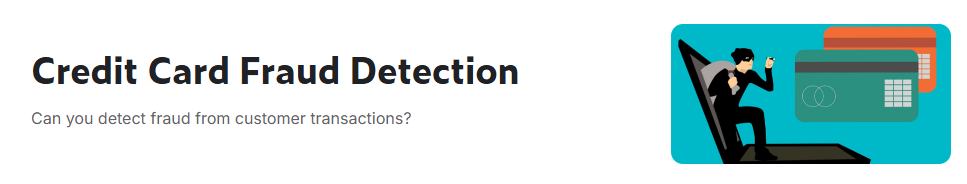
+ https://www.kaggle.com/competitions/credit-card-fraud-prediction/submissions

In [1]:
# =========================================
# ✅ 기본 패키지
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# =========================================
# ✅ 시각화 설정
# =========================================
sns.set()
plt.rcParams['font.family'] = 'Malgun Gothic'   # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# =========================================
# ✅ 데이터셋 로드용 (Scikit-learn 내장)
# =========================================
from sklearn.datasets import load_iris, load_breast_cancer

# =========================================
# ✅ 전처리 / 스케일링 / 인코딩
# =========================================
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    OneHotEncoder, LabelEncoder
)

# =========================================
# ✅ 차원 축소
# =========================================
from sklearn.decomposition import PCA

# =========================================
# ✅ 분류 모델
# =========================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
)
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# =========================================
# ✅ 데이터 분리 / 검증
# =========================================
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold,
    cross_val_score, GridSearchCV
)

# =========================================
# ✅ 평가 지표
# =========================================
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, fbeta_score, classification_report
)
import shap

In [2]:
# !pip install shap

# def models

In [3]:
random_state = 8033

def models(X, y, test_size=0.2, random_state=random_state):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state, stratify=y )

    model = LogisticRegression(max_iter=1000, random_state=random_state)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # 사기일 확률
    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC Score: {auc:.5f}")
    return model, auc, X_train, X_test, y_train, y_test

# Data Load

In [4]:
ctrain = pd.read_csv('../pred/train.csv')
ctest = pd.read_csv('../pred/test.csv')
print(ctrain.shape, ctest.shape)

(150000, 32) (69129, 31)


In [5]:
ctrain.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [6]:
ctest.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,0.010960,0.753938,-0.547338,0.559844,0.261633,0.847703,-0.992736,0.552428,-0.381524,-0.063139,0.919230,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
1,150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,0.057549,0.426822,0.151724,0.347829,0.121715,-0.175946,-0.090564,0.177865,0.614954,0.252661,-0.456465,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
2,150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,0.226865,-1.170845,0.079796,0.232440,-0.655584,0.926557,-0.715356,1.482958,1.818205,-0.466738,0.166645,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
3,150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,0.749163,-0.527557,0.135978,0.952855,0.329651,0.043979,-0.522082,0.051839,-0.079553,-0.291359,-0.049557,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
4,150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,0.066464,-0.407908,0.097648,-1.187040,0.161779,-0.472614,0.525869,0.597516,-1.202675,1.681688,-1.335861,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00


# 1차 점수

In [7]:
target_col = "IsFraud"
X = ctrain.drop(columns=[target_col, "id"])  # id는 식별자이므로 제거
y = ctrain[target_col]

model, auc, X_train, X_test, y_train, y_test = models(X, y)

AUC Score: 0.77421


# EDA

## Time 범위

In [8]:
print ( ctrain['Time'].min(), ctrain['Time'].max() )

0.0 73899.0


* Time : 첫 번째 거래로부터 경과한 시간을 초 단위로 나타냄
* 시간 범위는 0 ~ 73899

## 결측치

In [9]:
print ( ctrain.isnull().sum().sum(), ctest.isnull().sum().sum() ) 

0 0


* train / test 결측치 없음

## 타겟 변수 분석

In [10]:
print(ctrain.info(), ctrain['IsFraud'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

In [11]:
# IsFraud == 1 확률
269 / 149731

0.001796555155579005

* 전체 15만 데이터 중 사기일 확률은 0.0017뿐

In [12]:
ctrain[ctrain['IsFraud'] == 1]

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
1681,1681,764.0,0.845797,-1.063059,0.120133,-0.312570,-0.056194,1.944391,-0.661839,0.582721,-0.992366,0.564202,1.766655,0.826499,-0.307964,0.393909,0.907691,-2.822682,1.055578,-1.061441,-2.138524,-0.569641,-0.430906,-0.919078,0.123612,-1.420935,-0.072559,0.293439,0.061270,0.006448,136.58,1
2039,2039,923.0,-1.808089,1.794735,-2.574549,-1.944174,-4.093440,-1.360198,-8.837694,-3.865127,4.847707,-1.826233,-1.552959,1.796523,-1.531125,-0.242458,0.926706,0.113577,-0.155949,0.393524,1.085312,1.570826,-2.662635,1.173416,-0.136751,0.739760,-0.692745,0.818293,0.745100,0.847648,2.00,1
2090,2090,1028.0,-0.368027,1.492913,0.653399,0.164478,-1.043918,0.766250,-2.717382,-6.944203,-0.938474,-1.243744,1.555025,2.133379,0.125978,1.131705,0.057716,0.944642,-0.440088,0.049590,-0.878509,1.180116,-0.058687,1.185031,0.290564,0.528459,0.764303,-0.017768,0.110884,0.307835,0.12,1
3072,3072,1328.0,1.990241,-0.185837,-1.039174,0.086245,0.107037,-0.409425,0.016713,-0.126446,0.279865,0.184726,1.090518,1.617814,0.906706,0.254738,-0.673049,0.193427,-0.771428,-0.214947,0.468155,-0.094906,-0.142725,-0.285513,0.263769,0.779628,-0.261358,0.255895,-0.074999,-0.059828,23.31,1
3780,3780,1438.0,-0.738582,0.654464,0.652465,-0.139933,1.183689,-0.037131,0.638169,0.136502,-0.357541,-0.238928,1.039441,0.302428,-1.116929,0.651270,-0.295048,-0.421716,-0.456629,-0.037795,-0.826278,-0.314816,0.167918,0.563421,0.012614,-0.311213,0.105798,-0.252849,0.049231,0.108966,4.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147761,147761,73456.0,1.216273,0.516905,-0.624755,1.094436,0.403531,-0.391888,0.154194,0.005865,-0.084201,-0.396516,1.098939,-0.331036,-1.561946,-0.627901,0.624187,0.605965,0.587745,0.966353,-0.277716,-0.202916,-0.070340,-0.075050,-0.165133,-0.454173,0.695309,-0.298828,0.022076,0.028653,1.00,1
147901,147901,73499.0,1.202849,0.506734,-0.351667,0.788383,0.004716,-0.802345,0.009969,-0.039283,-0.204447,-0.566099,1.959295,0.567252,-0.136701,-1.155967,0.578896,0.812604,0.769886,0.784523,-0.321095,-0.070198,-0.053989,-0.126428,-0.070012,0.073733,0.446997,0.363536,-0.013855,0.033162,0.76,1
147942,147942,73514.0,1.054888,-1.564662,0.504515,-0.856142,-2.193655,-1.040109,-1.006727,-0.077236,-1.794577,1.616858,1.283389,-1.188087,-1.824077,0.274925,0.107736,-0.264600,0.551330,1.049892,-0.316053,-0.092601,0.108775,0.180527,-0.195632,0.744263,0.303024,0.077879,-0.019604,0.041725,202.50,1
148715,148715,73626.0,-2.161337,1.333889,1.995527,0.854291,-0.332323,0.076561,0.159969,-0.095815,0.856748,1.307501,0.352780,0.096899,0.776865,-0.849055,1.849073,0.037887,-0.570044,-0.111490,-0.252919,0.521020,-0.202639,0.221634,0.171239,0.084834,-0.362708,-0.268099,0.116900,0.055786,0.75,1


## 정상 vs 사기 Boxplot

총 30개 피처를 6개씩 묶어 5개의 차트로 생성합니다.


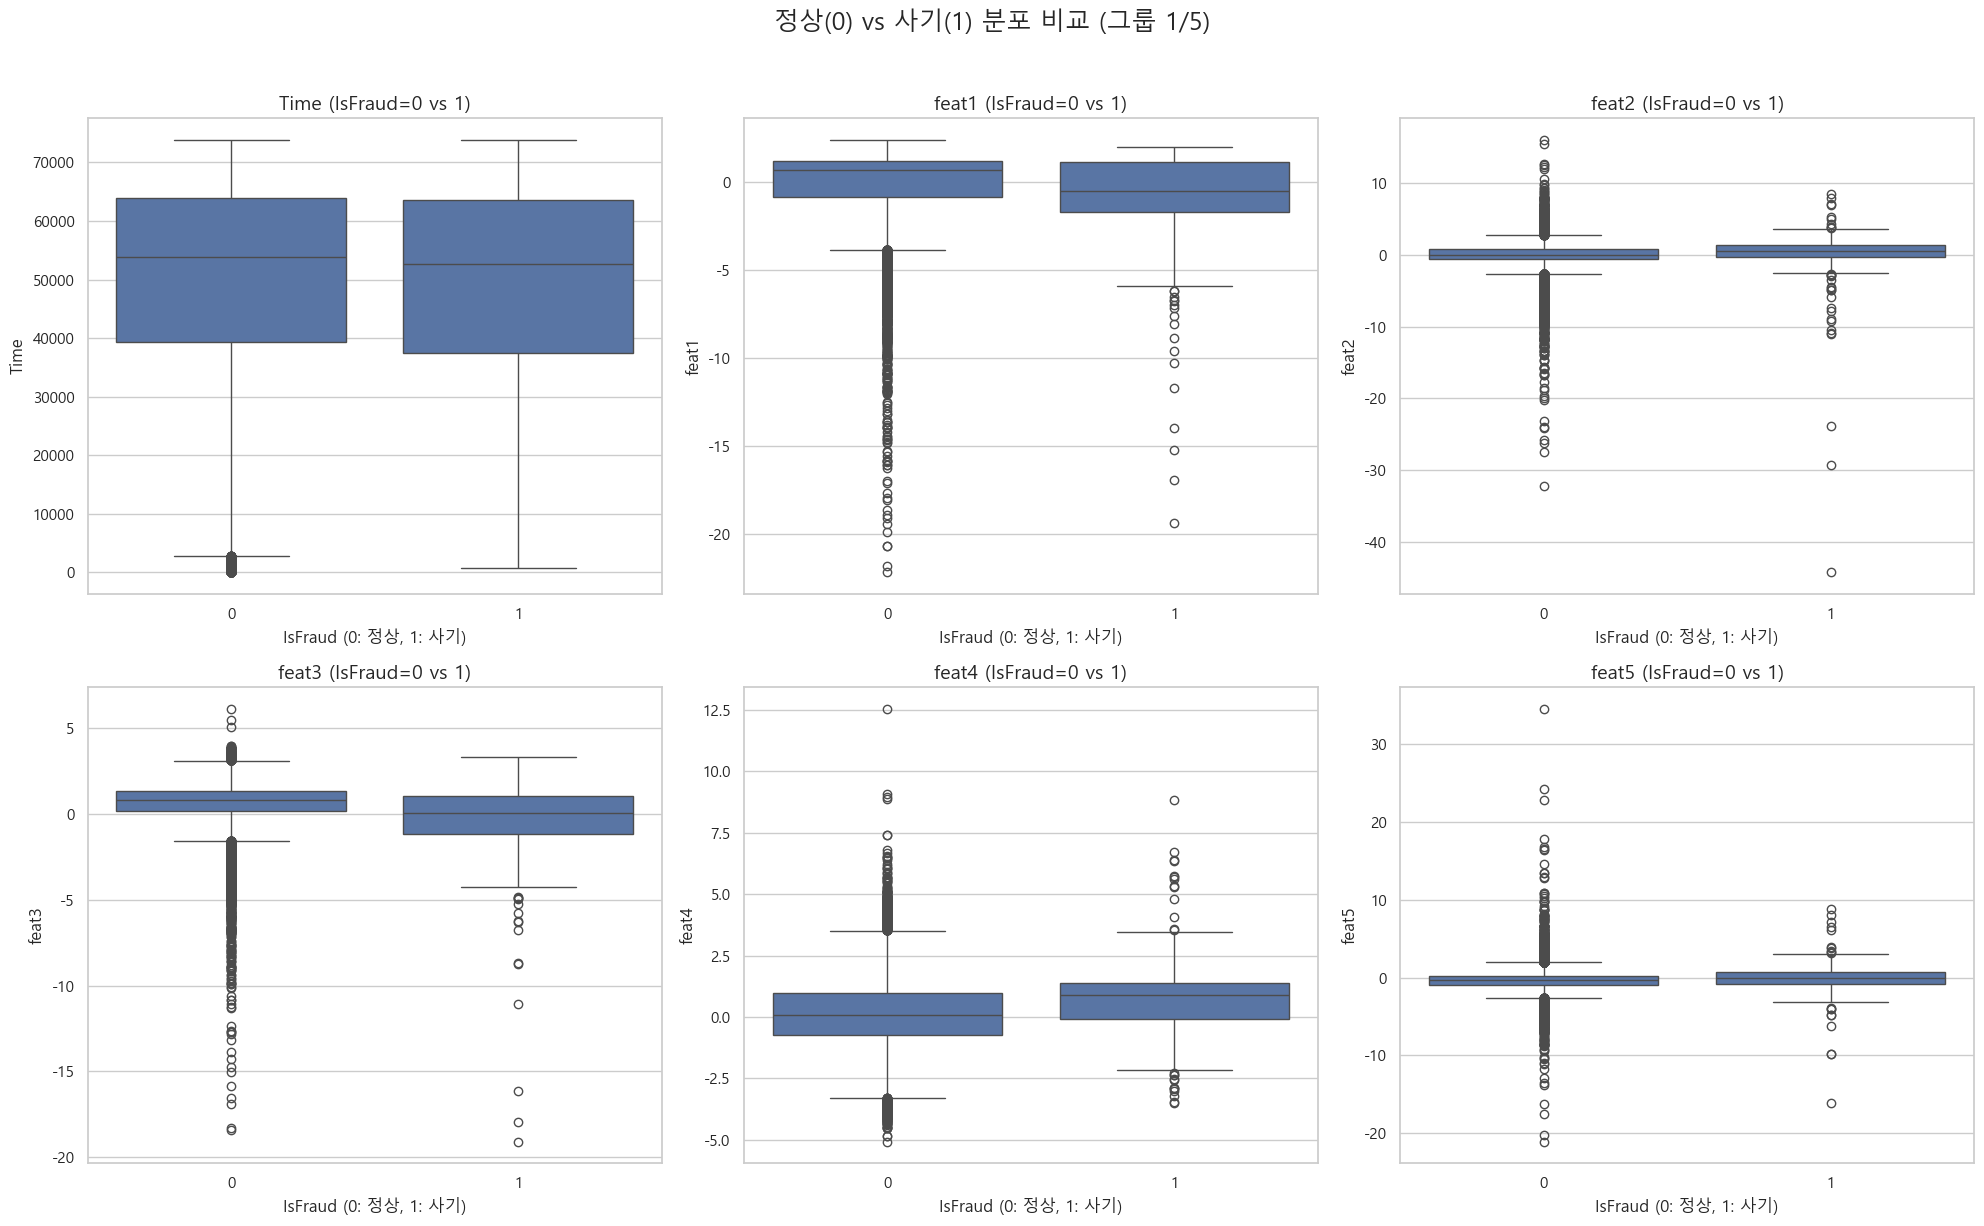

'boxplot_comparison_group_1.png' 저장 완료.



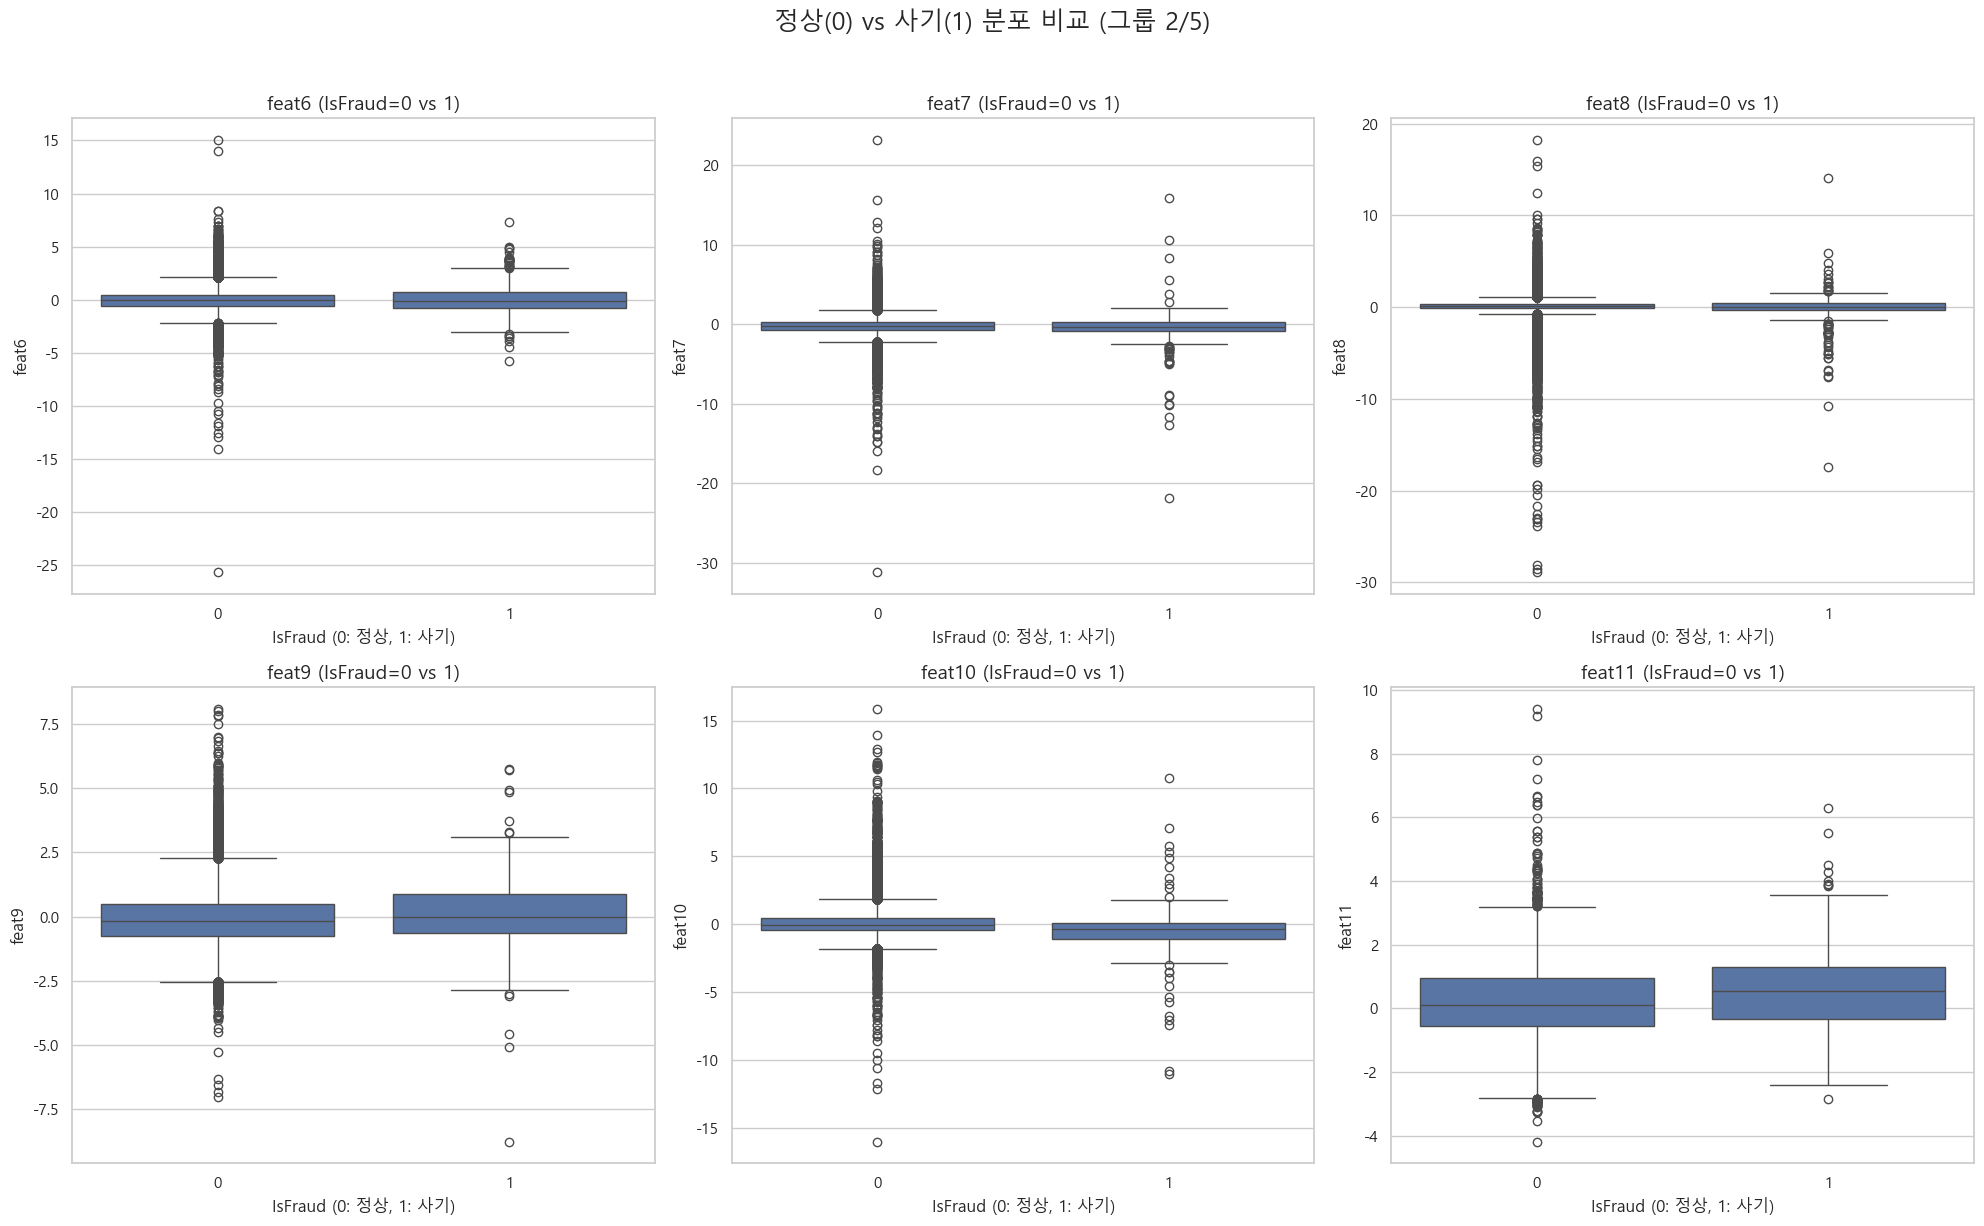

'boxplot_comparison_group_2.png' 저장 완료.



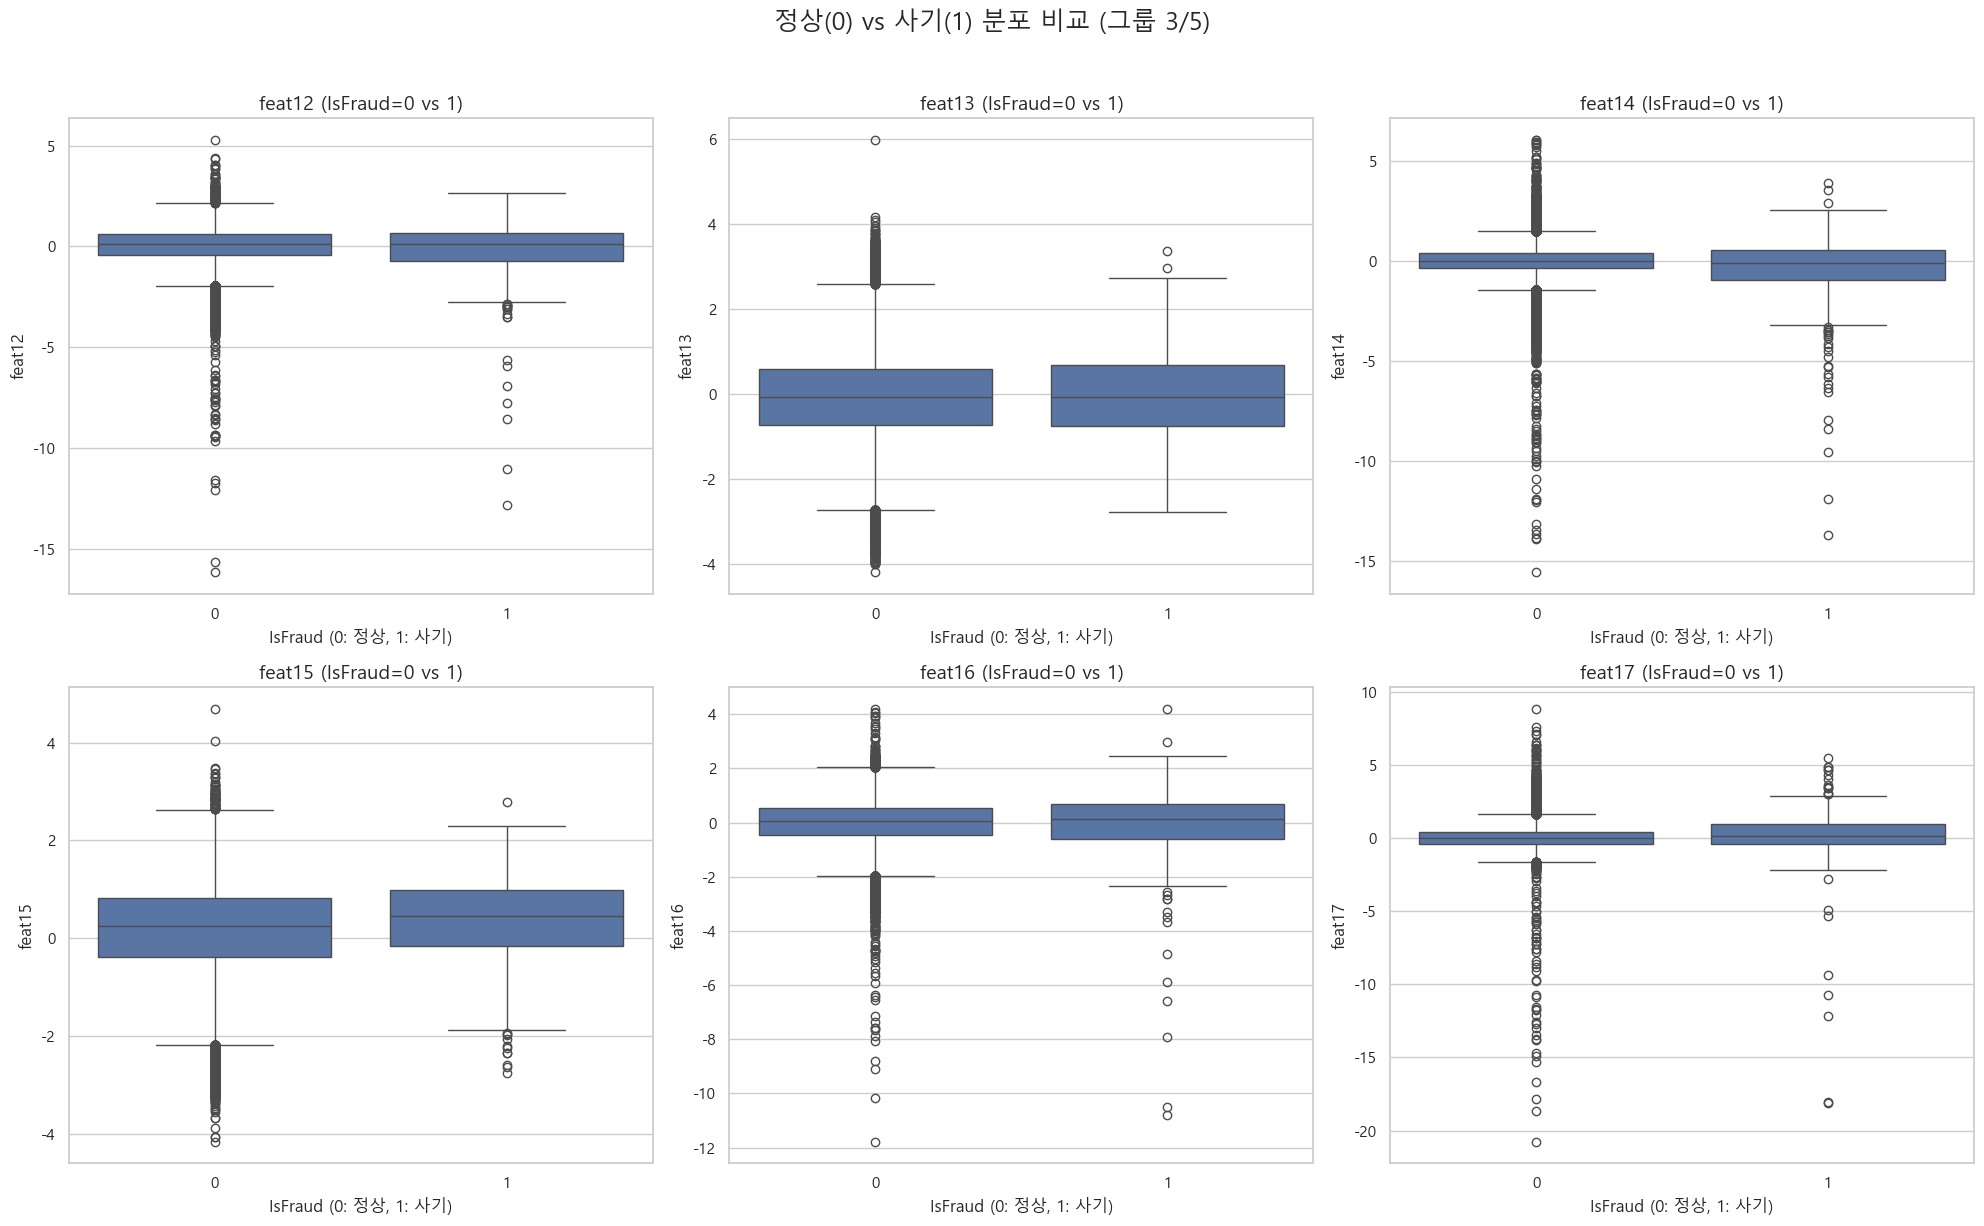

'boxplot_comparison_group_3.png' 저장 완료.



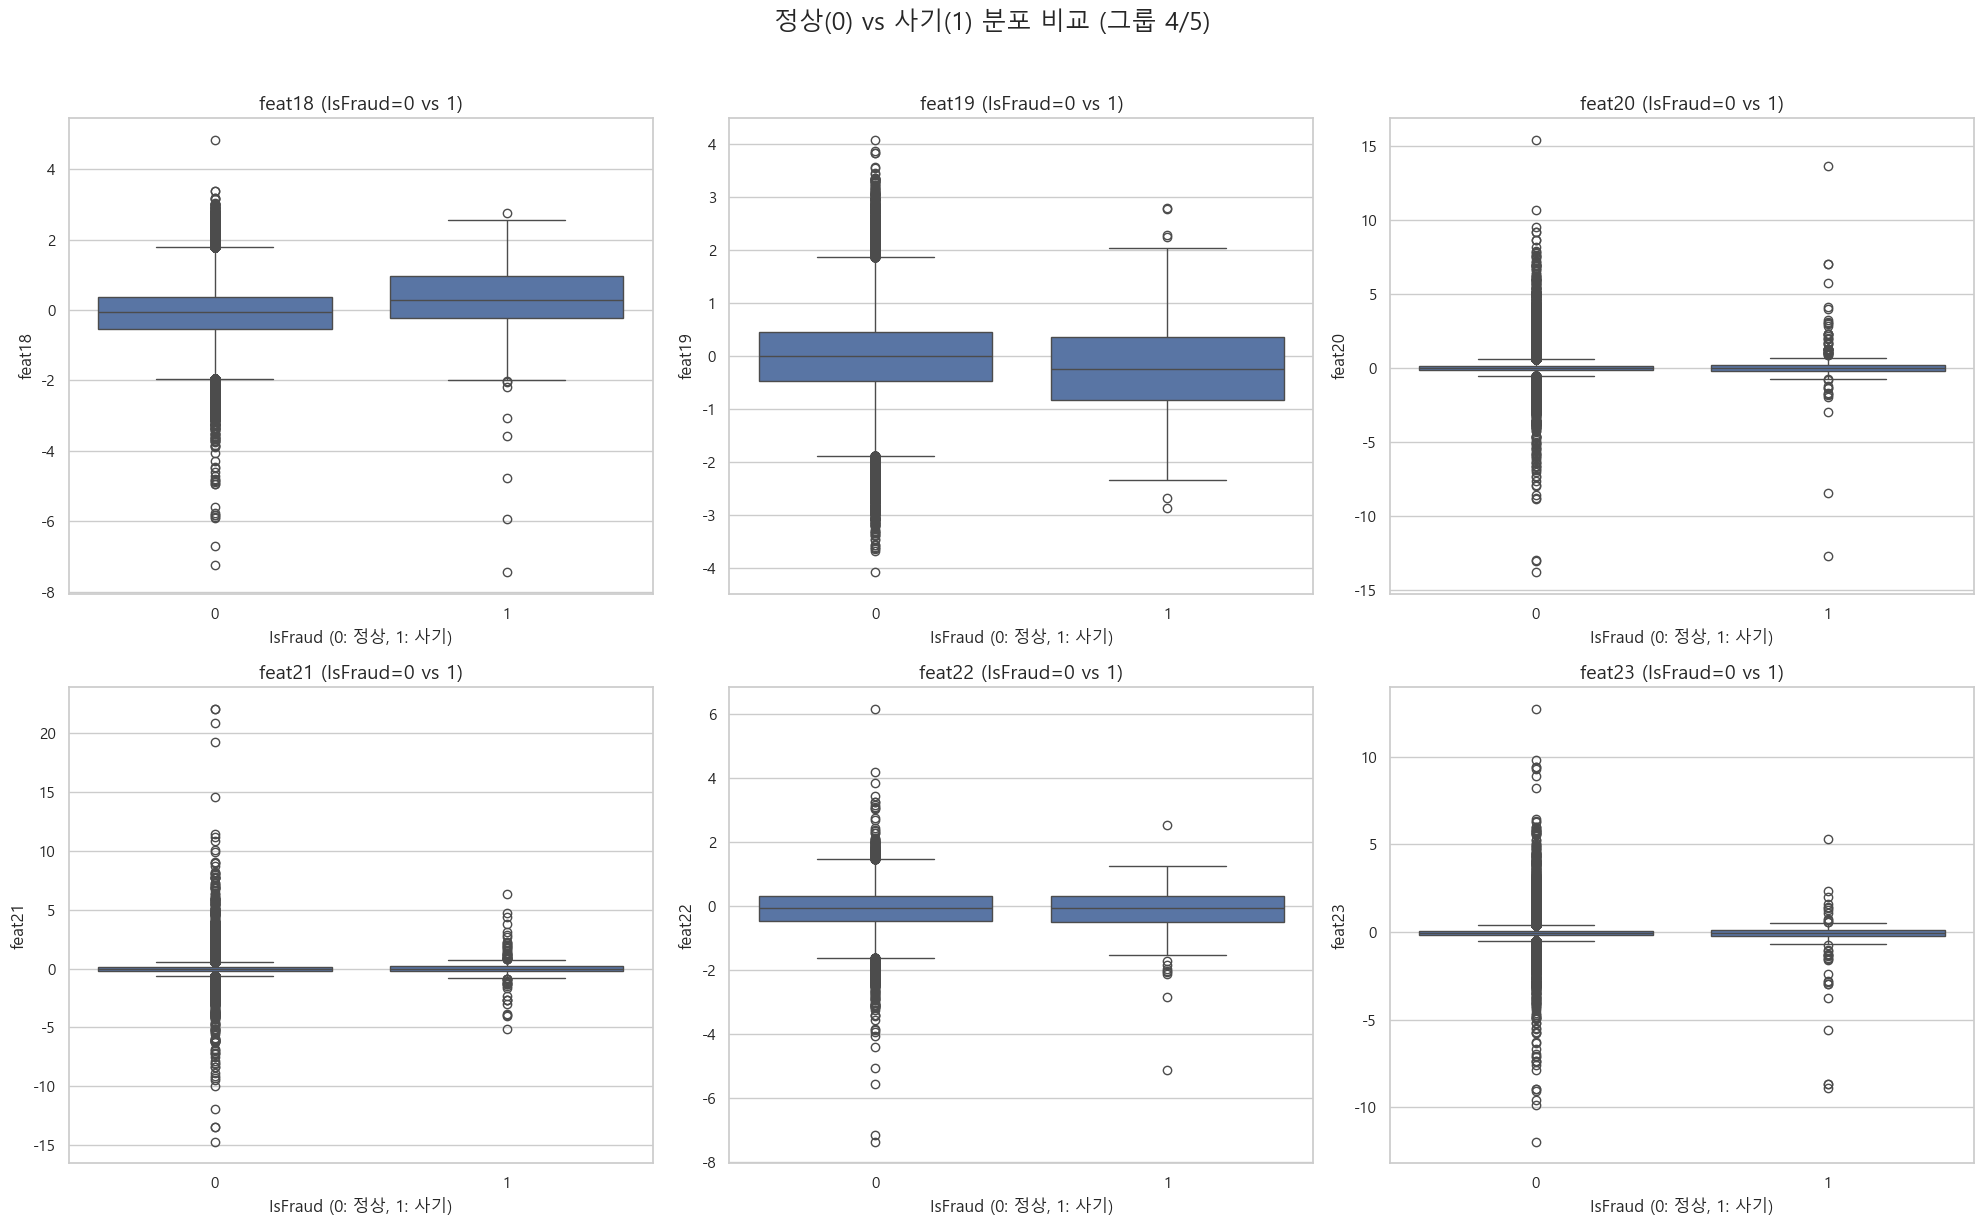

'boxplot_comparison_group_4.png' 저장 완료.



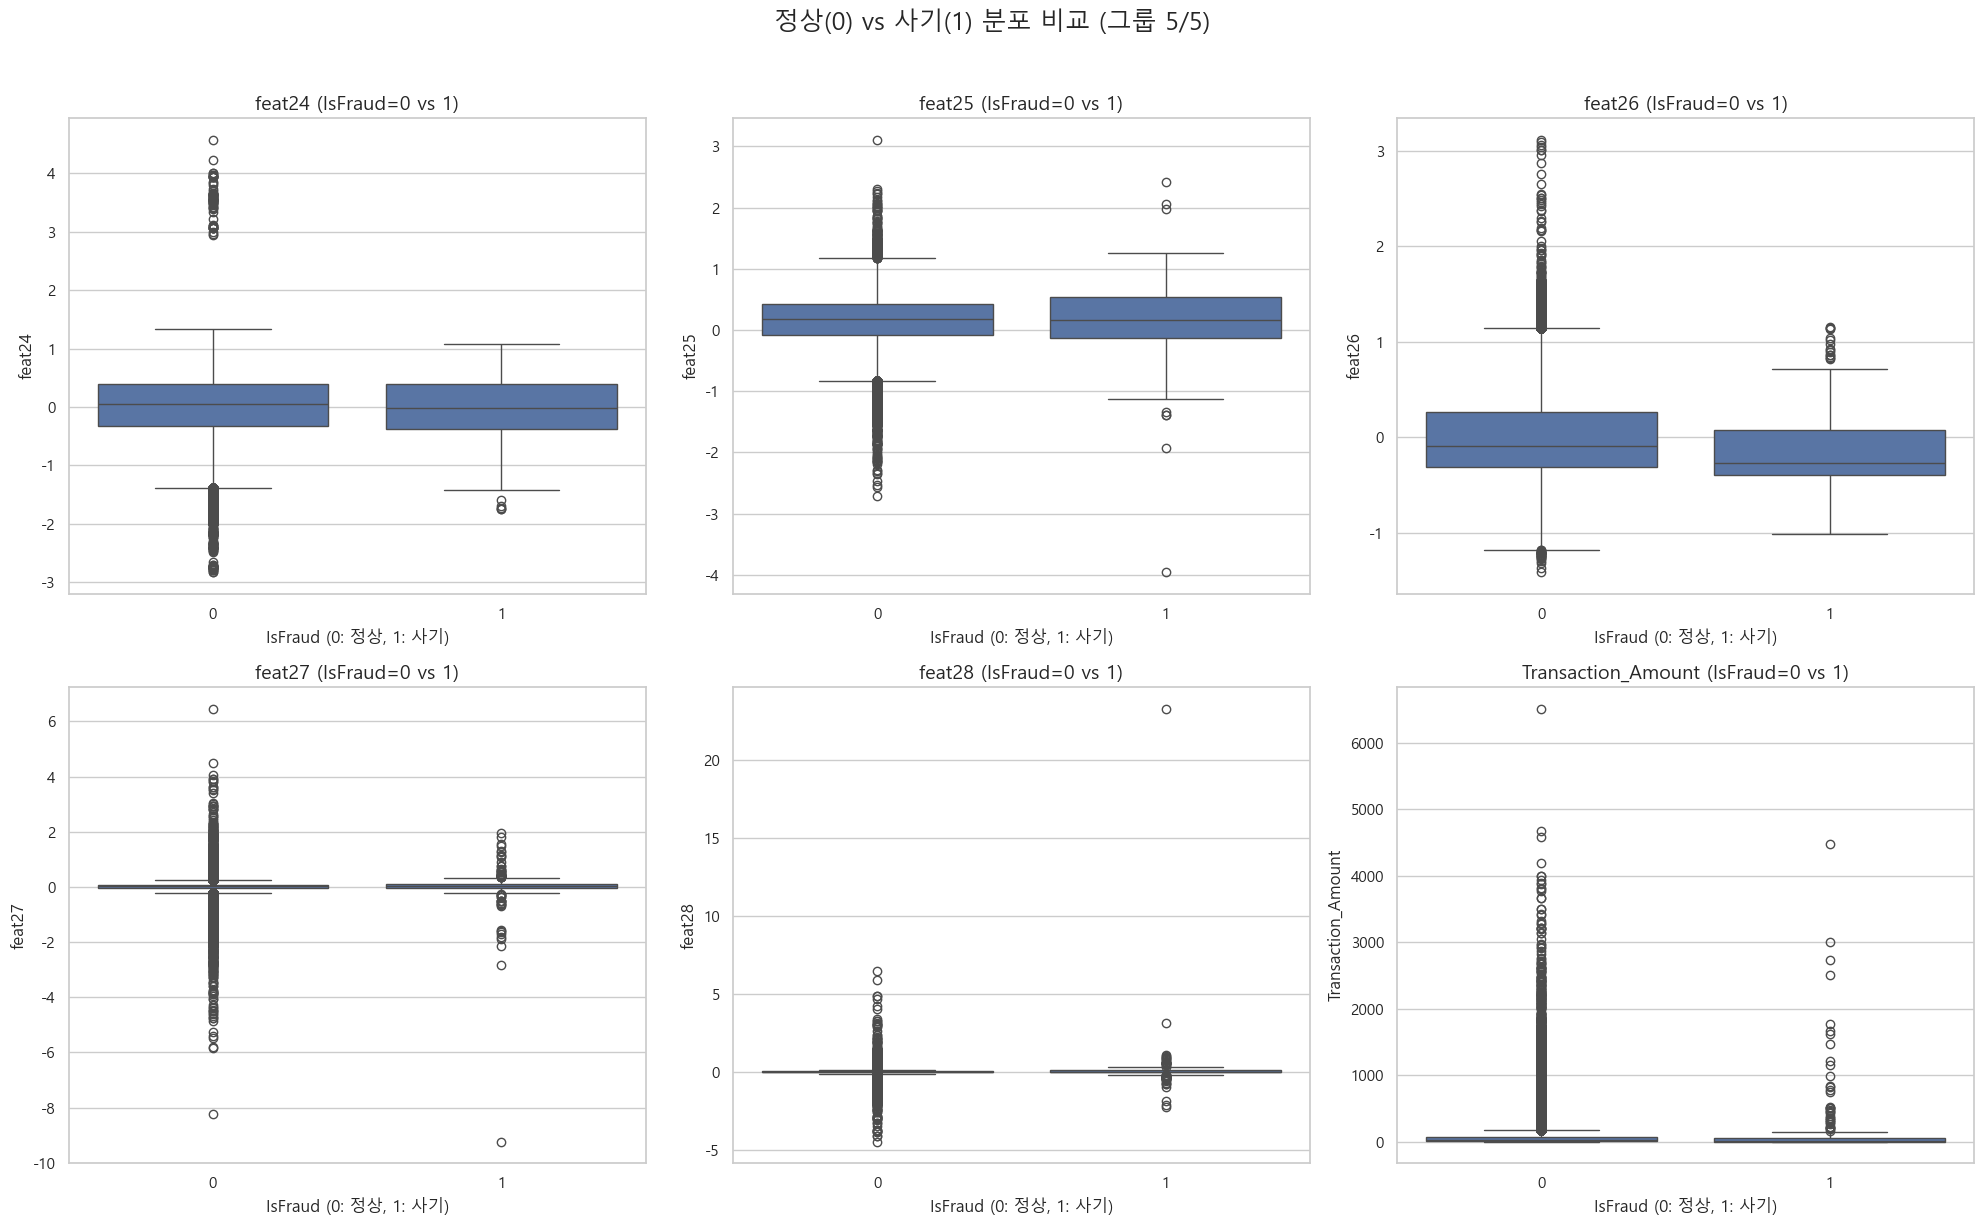

'boxplot_comparison_group_5.png' 저장 완료.

--- 모든 박스 플롯 생성 완료 ---


In [13]:
sns.set_style('whitegrid') # 그래프 스타일 설정
# 한글 폰트 설정 (필요시 주석 해제)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

features = [col for col in ctrain.columns if col not in ['id', 'IsFraud']]

# 30개 피처를 6개씩 나눔 (총 5 그룹)
n_groups = 5
features_per_group = 6

print(f"총 {len(features)}개 피처를 {features_per_group}개씩 묶어 {n_groups}개의 차트로 생성합니다.")

# --- 4. 박스 플롯 시각화 (그룹별 반복) ---
for i in range(n_groups):
    # 현재 그룹의 피처 선택
    current_features = features[i*features_per_group : (i+1)*features_per_group]
    
    # 2행 3열의 서브플롯 생성
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'정상(0) vs 사기(1) 분포 비교 (그룹 {i+1}/{n_groups})', fontsize=18, y=1.02)
    
    # axes를 1차원 배열로 펼침 (반복문 사용이 편리하도록)
    axes_flat = axes.flatten()
    
    for j, feature in enumerate(current_features):
        # sns.boxplot을 사용하여 IsFraud(x축)에 따른 feature(y축) 분포 시각화
        sns.boxplot(data=ctrain, x='IsFraud', y=feature, ax=axes_flat[j])
        axes_flat[j].set_title(f'{feature} (IsFraud=0 vs 1)', fontsize=14)
        axes_flat[j].set_xlabel('IsFraud (0: 정상, 1: 사기)')
        axes_flat[j].set_ylabel(feature)

    # 5. 레이아웃 조절 및 저장
    plt.tight_layout()
    
    plot_filename = f'boxplot_comparison_group_{i+1}.png'
    plt.savefig(plot_filename)
    plt.show() # 주피터 노트북에서 바로 보기
    
    print(f"'{plot_filename}' 저장 완료.\n")

print("--- 모든 박스 플롯 생성 완료 ---")

## 피처별 이상치 제거

In [14]:
outlier_rules = {
    'feat2': {'upper': 10},
    'feat3': {'upper': 5},
    'feat4': {'upper': 10, 'lower': -5},
    'feat5': {'upper': 10, 'lower': -20},
    'feat6': {'upper': 10, 'lower': -10},
    'feat7': {'upper': 20, 'lower': -30},
    'feat8': {'lower': -20},
    'feat9': {'upper': 7.5},
    'feat10': {'upper': 15, 'lower': -15},
    'feat11': {'upper': 7, 'lower': -4},
    'feat12': {'upper': 4, 'lower': -15},
    'feat13': {'upper': 4, 'lower': -3},
    'feat14': {'upper': 5},
    'feat15': {'upper': 4, 'lower': -3},
    'feat17': {'upper': 6, 'lower': -20},
    'feat18': {'upper': 4},
    'feat19': {'upper': 3, 'lower': -3},
    'feat21': {'upper': 10, 'lower': -10},
    'feat22': {'upper': 4, 'lower': -6},
    'feat23': {'upper': 6, 'lower': -10},
    'feat24': {'upper': 2, 'lower': -2},
    'feat25': {'upper': 3},
    'feat26': {'upper': 1.5, 'lower': -1.2},
    'feat27': {'upper': 3, 'lower': -4},
    'transaction_amount': {'upper': 5000},
}

# --------------------------
# 🚀 이상치 제거 함수
# --------------------------
def remove_outliers_isfraud0(df, rules):
    df = df.copy()
    df_0 = df[df['IsFraud'] == 0].copy()  # IsFraud=0만 복사
    df_1 = df[df['IsFraud'] == 1].copy()  # IsFraud=1은 그대로 유지

    before_len = len(df_0)

    for col, bounds in rules.items():
        if col not in df_0.columns:
            continue
        if 'upper' in bounds:
            df_0 = df_0[df_0[col] <= bounds['upper']]
        if 'lower' in bounds:
            df_0 = df_0[df_0[col] >= bounds['lower']]

    after_len = len(df_0)
    removed = before_len - after_len

    print(f"IsFraud=0 이상치 제거 완료: {removed}개 제거됨 ({before_len} → {after_len})")

    # IsFraud=0 정제된 데이터 + IsFraud=1 원본 병합
    df_cleaned = pd.concat([df_0, df_1], ignore_index=True)
    return df_cleaned

# 실행
ctrain_cleaned = remove_outliers_isfraud0(ctrain, outlier_rules)

print("정제 후 데이터 크기:", ctrain_cleaned.shape)

IsFraud=0 이상치 제거 완료: 1094개 제거됨 (149731 → 148637)
정제 후 데이터 크기: (148906, 32)


## train + test Boxplot

데이터 통합 완료: {'train': 148906, 'test': 69129}
📊 시각화 대상 피처 수: 30개


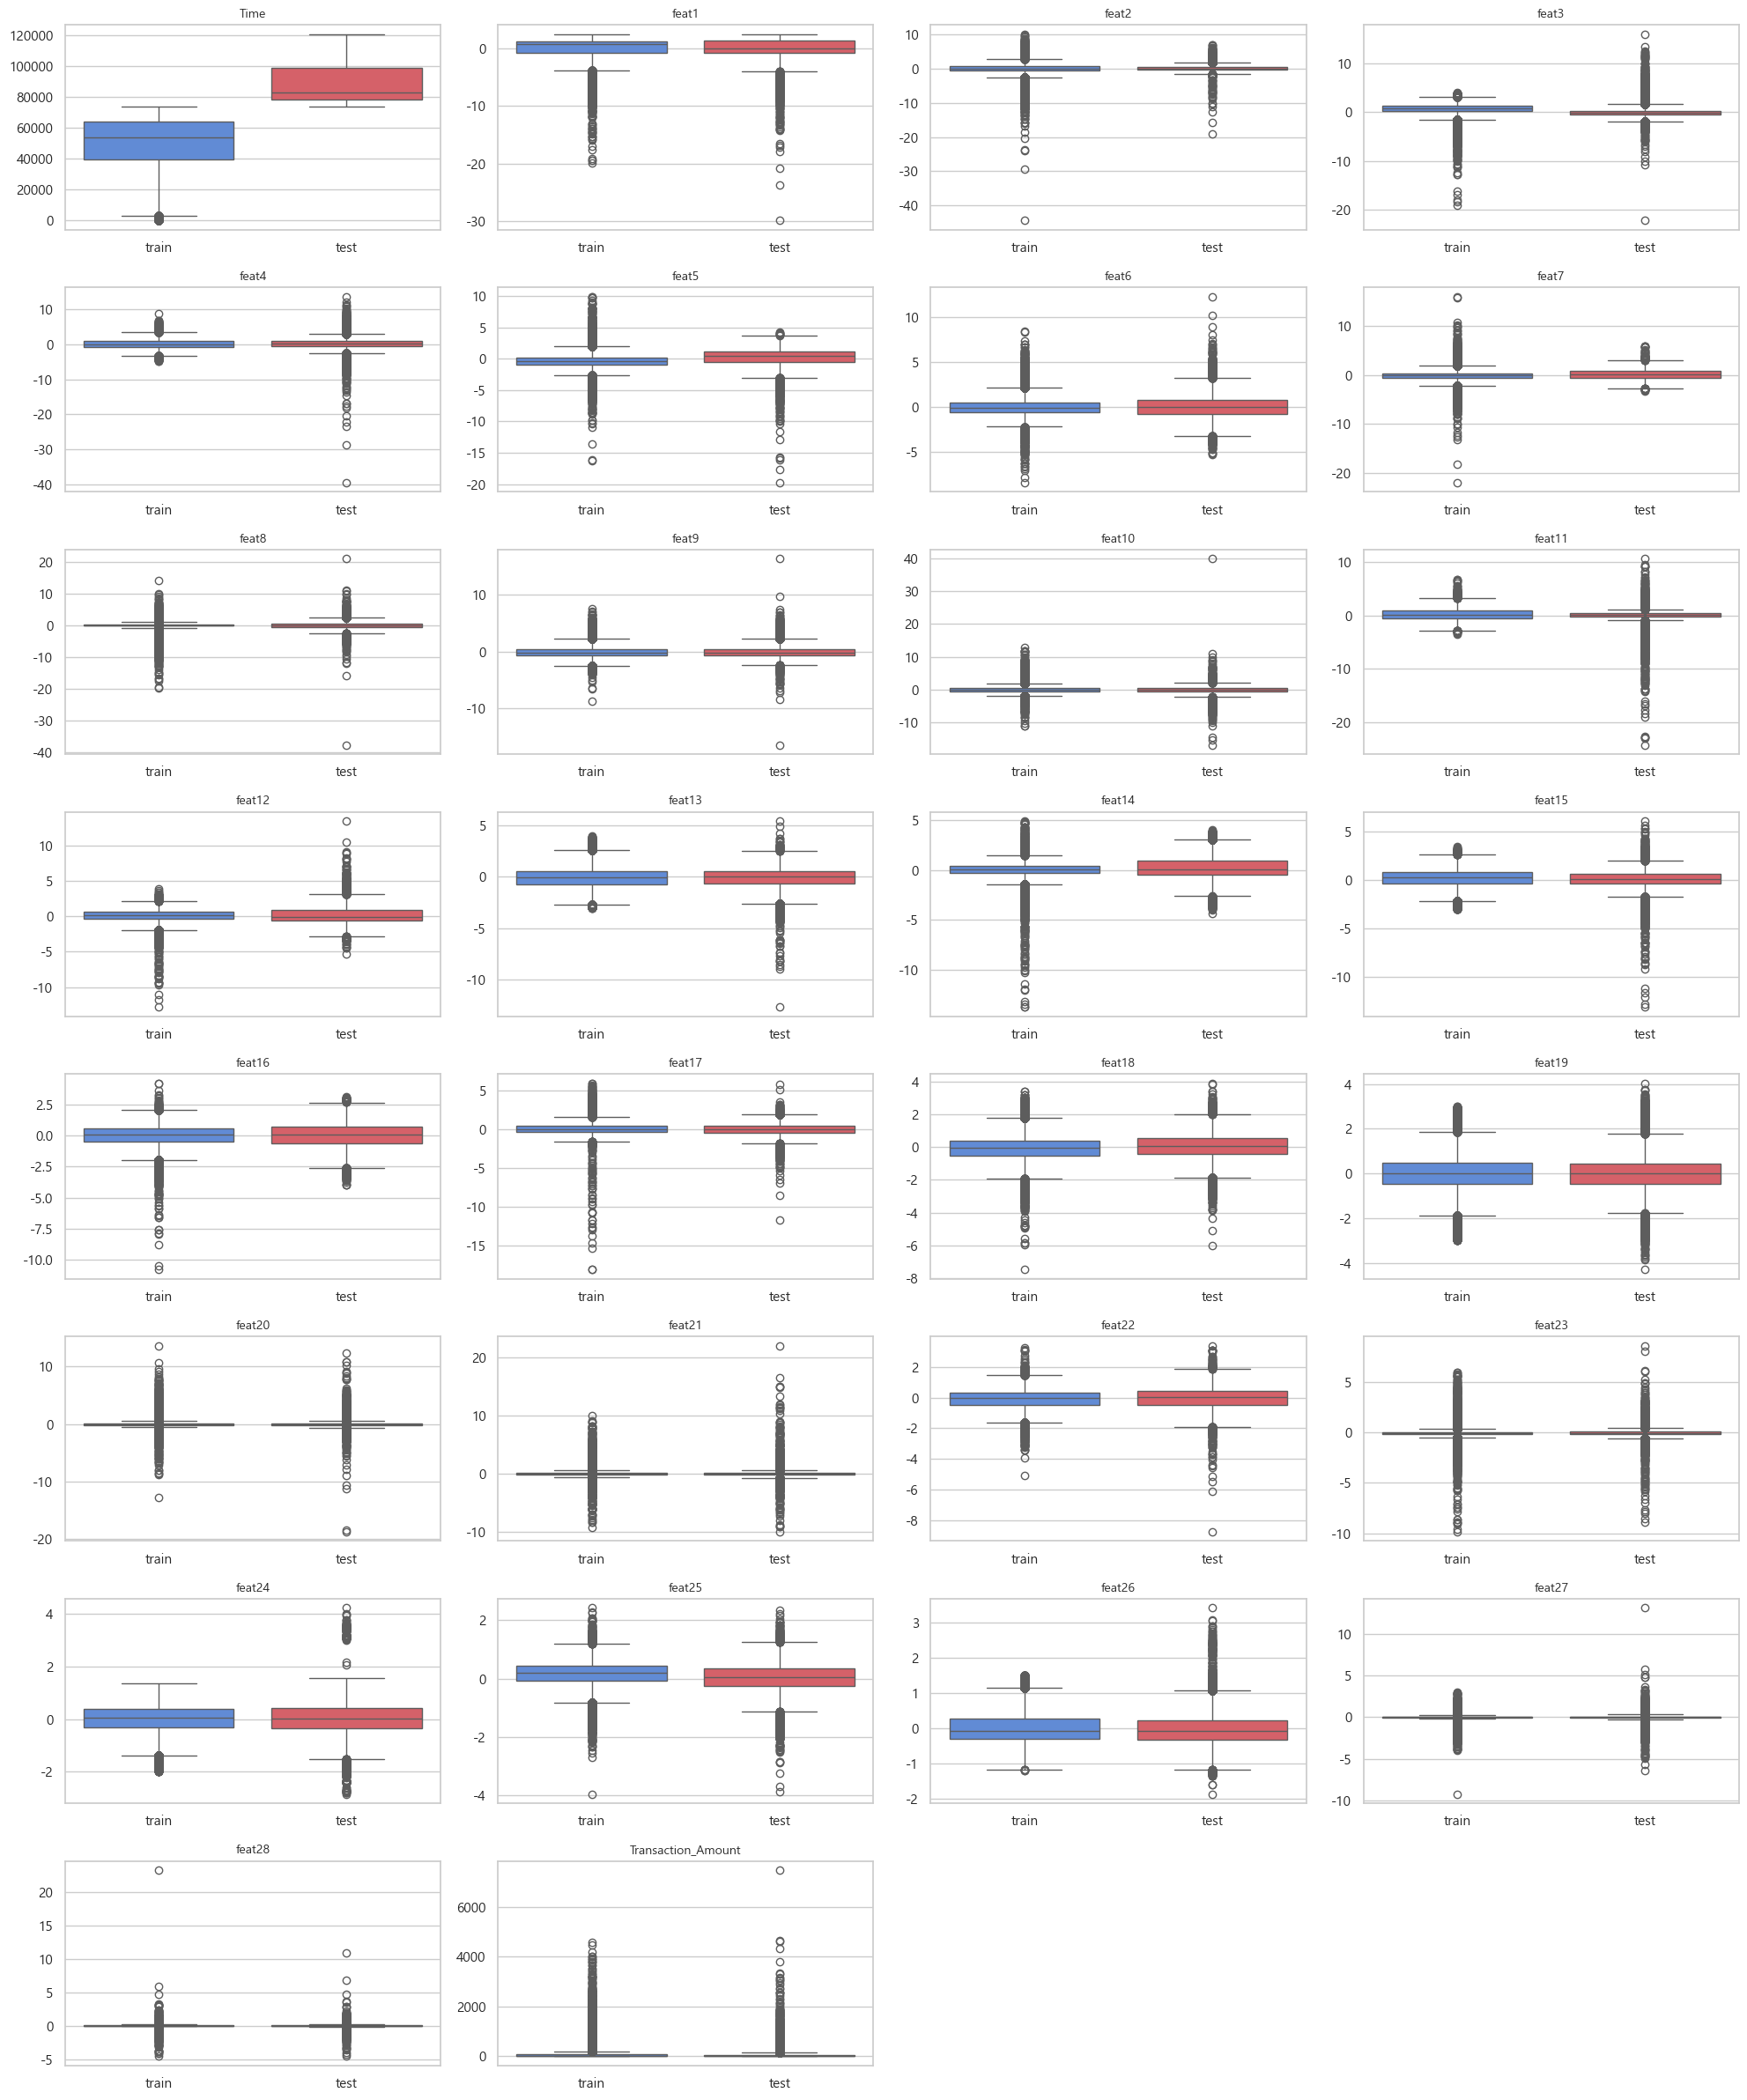

In [15]:
ctrain_cleaned["gubun"] = "train"
ctest["gubun"] = "test"

# 3️⃣ 합치기
df = pd.concat([ctrain_cleaned, ctest], ignore_index=True)

print("데이터 통합 완료:", df["gubun"].value_counts().to_dict())

# 4️⃣ 수치형 피처만 자동 선택 (target, id 등 제외)
exclude_cols = ["gubun", "IsFraud", "id", "is_train"]
num_cols = df.select_dtypes(include=["float", "int"]).columns.drop(exclude_cols, errors="ignore").tolist()

print(f"📊 시각화 대상 피처 수: {len(num_cols)}개")

# 5️⃣ Boxplot 시각화
n_cols = 4  # 한 줄에 4개씩
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # 행 개수 자동 계산

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        x="gubun", y=col, data=df,
        ax=axes[i],
        palette={"train": "#4E85E8", "test": "#E84E58"}
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# 빈 subplot 숨기기
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

* Time은 학습에 전혀 쓸모가 없다

In [16]:
# 이상치 조건 정의
outlier_rules = {
    'feat2': {'upper': 10, 'lower': -20},
    'feat5': {'upper': 5},
    'feat6': {'lower': -6},
    'feat7': {'upper': 7, 'lower': -5},
    'feat12': {'lower': -6},
    'feat14': {'upper': 5, 'lower': -5},
    'feat16': {'lower': -5},
    'feat17': {'lower': -13},
    'feat28': {'upper': 20},
}

# --------------------------
# 🚀 이상치 제거 함수
# --------------------------
def remove_outliers_custom(df, rules):
    df = df.copy()
    before_len = len(df)

    for col, bounds in rules.items():
        if col not in df.columns:
            continue
        if 'upper' in bounds:
            df = df[df[col] <= bounds['upper']]
        if 'lower' in bounds:
            df = df[df[col] >= bounds['lower']]

    after_len = len(df)
    print(f"총 제거된 이상치 개수: {before_len - after_len}개 ({before_len} → {after_len})")
    return df

# 실행
ctrain_final = remove_outliers_custom(ctrain_cleaned, outlier_rules)

print("최종 데이터 크기:", ctrain_final.shape)

총 제거된 이상치 개수: 220개 (148906 → 148686)
최종 데이터 크기: (148686, 33)


In [17]:
ctrain = ctrain_final
ctrain.shape

(148686, 33)

In [18]:
ctrain = ctrain.drop('gubun', axis=1)
ctest = ctest.drop('gubun', axis=1)

In [19]:
print( ctrain.columns, ctest.columns )

Index(['id', 'Time', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6',
       'feat7', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13',
       'feat14', 'feat15', 'feat16', 'feat17', 'feat18', 'feat19', 'feat20',
       'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat27',
       'feat28', 'Transaction_Amount', 'IsFraud'],
      dtype='object') Index(['id', 'Time', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6',
       'feat7', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13',
       'feat14', 'feat15', 'feat16', 'feat17', 'feat18', 'feat19', 'feat20',
       'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat27',
       'feat28', 'Transaction_Amount'],
      dtype='object')


## Heatmap

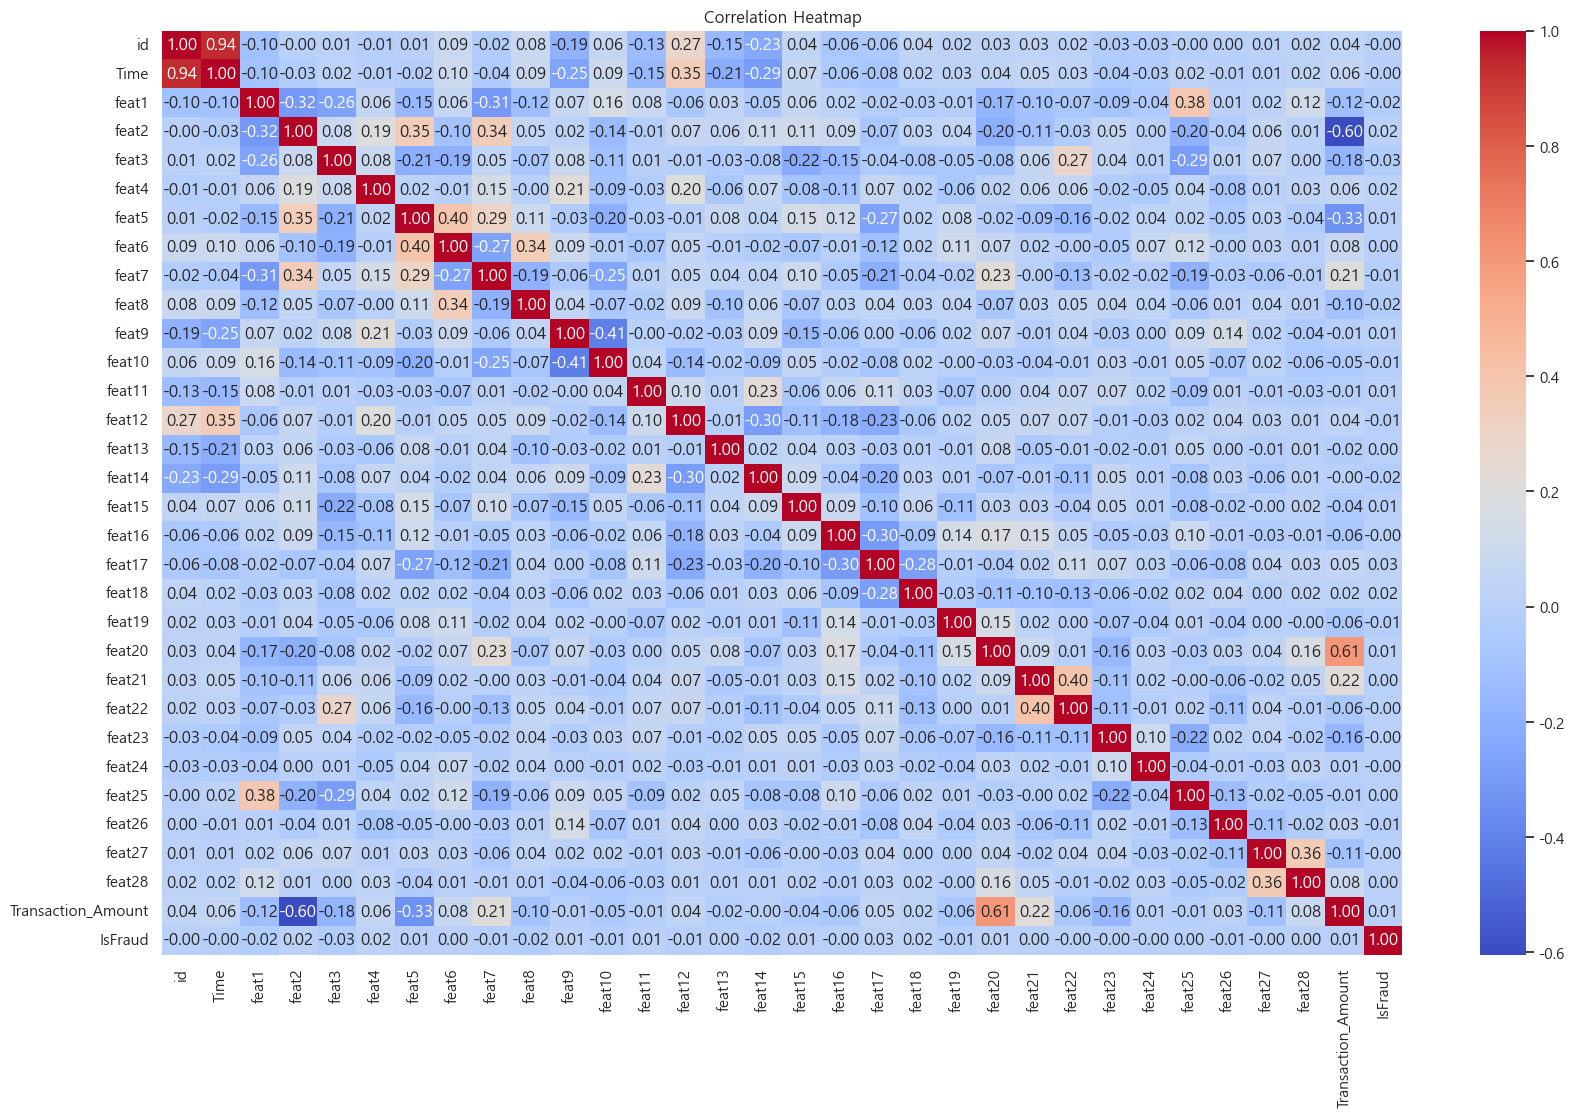

In [20]:
# Calculate correlation matrix
correlation_matrix = ctrain.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## SHAP

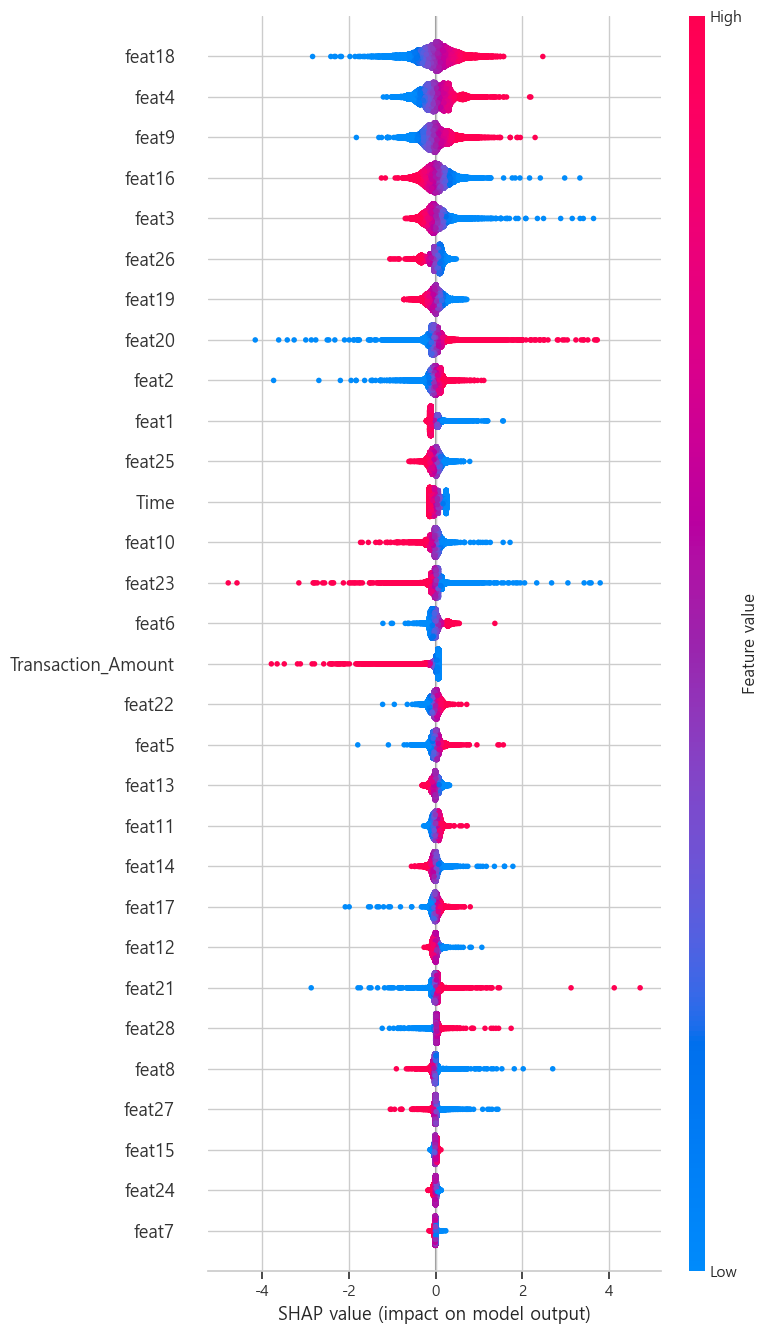

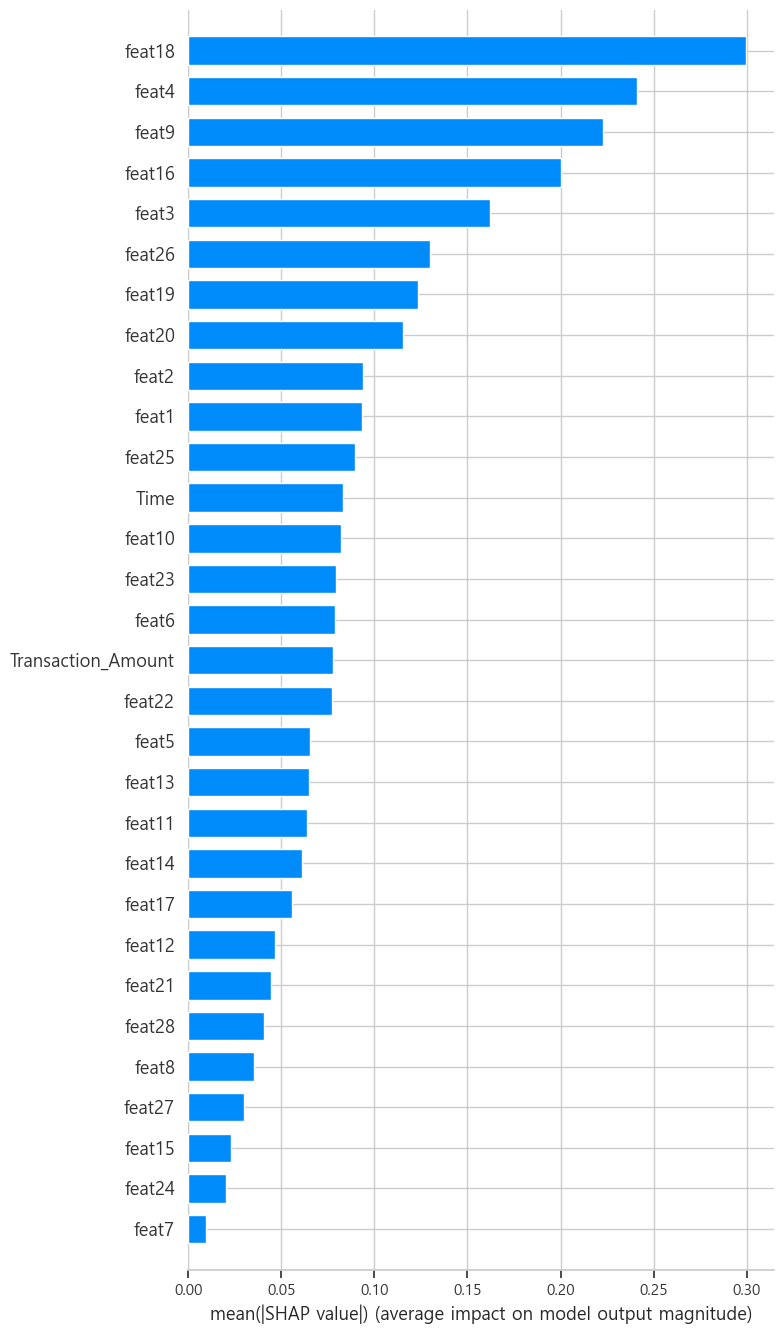

In [21]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])

# 평균 절대값 기준 중요도 (Bar Plot)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=X_test.shape[1])

In [22]:
import pandas as pd
from scipy.stats import pearsonr

def independence_test_numeric(df, threshold=0.7):
    numeric_cols = df.select_dtypes(include='number').columns
    results = []

    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            corr, p_value = pearsonr(df[col1], df[col2])
            results.append({
                "Feature1": col1,
                "Feature2": col2,
                "Correlation": corr,
                "p-value": p_value,
                "Dependent?": abs(corr) > threshold and p_value < 0.05
            })

    result_df = pd.DataFrame(results).sort_values(by="Correlation", key=abs, ascending=False)
    return result_df

# 사용 예시
independence_results = independence_test_numeric(ctrain)
print(independence_results)


    Feature1            Feature2  Correlation   p-value  Dependent?
0         id                Time     0.941192  0.000000        True
449   feat20  Transaction_Amount     0.605637  0.000000       False
116    feat2  Transaction_Amount    -0.603814  0.000000       False
265    feat9              feat10    -0.414511  0.000000       False
171    feat5               feat6     0.401432  0.000000       False
..       ...                 ...          ...       ...         ...
432   feat19              feat22     0.000344  0.894611       False
314   feat11              feat20     0.000271  0.916755       False
492   feat27             IsFraud    -0.000199  0.938934       False
404   feat16             IsFraud    -0.000122  0.962376       False
26        id              feat26     0.000094  0.971081       False

[496 rows x 5 columns]


In [23]:
high_corr = independence_results[abs(independence_results["Correlation"]) >= 0.8]
high_corr = high_corr[high_corr["p-value"] < 0.05]

print(high_corr)

  Feature1 Feature2  Correlation  p-value  Dependent?
0       id     Time     0.941192      0.0        True


<pre>
피처들 전부 수치형이라서 피어슨 상관계수와 p-value를 통한 피처간 독립성 검정
1. 피어슨 상관계수 : 두 변수의 선형적 관련이 있는지 측정
2. p-value : 그 상관이 통계적으로 유의한지 판단

    결과 -> 모든 피처가 독립적이다. 즉 모델에 그대로 사용해도 됨

# 전처리

## train + test

In [24]:
ctrain[train"] = 1
ctest["is_train"] = 0
"is_
df = pd.concat([ctrain, ctest], axis=0, ignore_index=True)

In [25]:
df.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud,is_train
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0.0,1
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0.0,1
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0.0,1
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0.0,1
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0.0,1


# 2차 점수

In [26]:
# train/test 다시 분리
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

models(X, y);

AUC Score: 0.80767


In [27]:
random_state = 8033

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ✅ 실제 test_df의 id 그대로 사용
    "IsFraud": y_submit_proba   # 예측 확률값 저장
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 생성 완료!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.80767
✅ submission.csv 생성 완료!
submission.csv shape: (69129, 2)


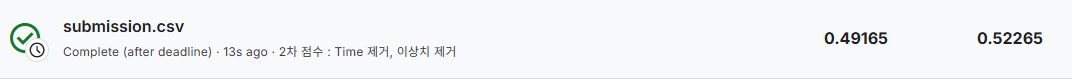

<pre>
1차 점수 : AUC Score: 0.77421
2차 점수 : AUC Score: 0.52265 ( LR ) 

## Transaction_Amount

<Axes: >

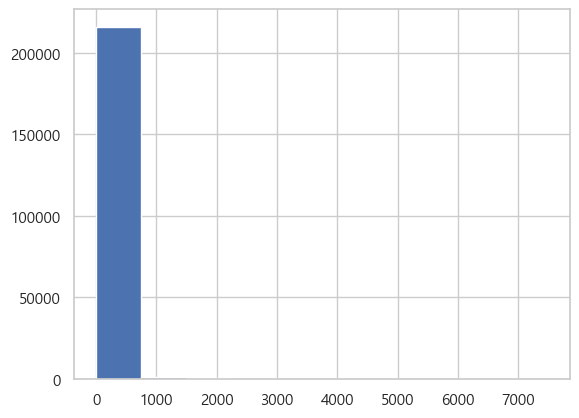

In [29]:
df['Transaction_Amount'].hist()

### 전체 평균 대비 비율 / 차이

In [30]:
df["Amount_to_GlobalMean"] = df["Transaction_Amount"] / df["Transaction_Amount"].mean()
df["Amount_GlobalDiff"] = df["Transaction_Amount"] - df["Transaction_Amount"].mean()

### 시간대별 평균 대비 비율

### 이동평균 (전체 시계열 기준)

In [31]:
if "Time" in df.columns:
    df = df.sort_values("Time")
    df["Amount_Rolling_Mean"] = df["Transaction_Amount"].rolling(window=3, min_periods=1).mean()

## Transaction_Amount 과의 corr()

In [32]:
corr = df[['Transaction_Amount', 'Amount_to_GlobalMean', 'Amount_GlobalDiff',
           'Amount_Rolling_Mean']].corr()
print (corr['Transaction_Amount']) 

Transaction_Amount      1.00000
Amount_to_GlobalMean    1.00000
Amount_GlobalDiff       1.00000
Amount_Rolling_Mean     0.58844
Name: Transaction_Amount, dtype: float64


<pre>
Amount_to_GlobalMean : TA와 수학적으로 선형 관계 - 제거
Amount_GlobalDiff : TA와 수학적으로 선형 관계 - 제거

Amount_Rolling_Mean : 거래 흐름 정보, 독립적 의미 있음

In [33]:
df = df.drop(columns=['Amount_to_GlobalMean','Amount_GlobalDiff'])

# 3차 점수

In [34]:
train_df.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud,is_train
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0.0,1
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0.0,1
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0.0,1
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0.0,1
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0.0,1


In [35]:
# train/test 다시 분리
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

models(X, y);

AUC Score: 0.77824


In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ✅ 실제 test_df의 id 그대로 사용
    "IsFraud": y_submit_proba   # 예측 확률값 저장
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 생성 완료!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.77824
✅ submission.csv 생성 완료!
submission.csv shape: (69129, 2)


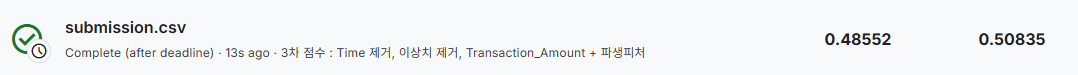

In [37]:
# train/test 다시 분리
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', 'Transaction_Amount'])

models(X, y);

AUC Score: 0.78779


In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time","Transaction_Amount"], errors='ignore')

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=random_state
)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ✅ 실제 test_df의 id 그대로 사용
    "IsFraud": y_submit_proba   # 예측 확률값 저장
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 생성 완료!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.78779
✅ submission.csv 생성 완료!
submission.csv shape: (69129, 2)


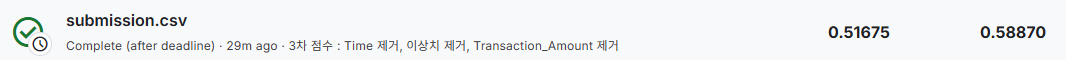

## 트리형 모델 변경

In [39]:
def tmodels(X, y, test_size=0.2, random_state=8033):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state, stratify=y )

    model = xgb.XGBClassifier(random_state=random_state)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # 사기일 확률
    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC Score: {auc:.5f}")
    return model, auc, X_train, X_test, y_train, y_test

In [40]:
# train/test 다시 분리
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', 'Transaction_Amount'])

tmodels(X, y);

AUC Score: 0.68677


In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time","Transaction_Amount"], errors='ignore')

lr_model =xgb.XGBClassifier(random_state=random_state)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ✅ 실제 test_df의 id 그대로 사용
    "IsFraud": y_submit_proba   # 예측 확률값 저장
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 생성 완료!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.68677
✅ submission.csv 생성 완료!
submission.csv shape: (69129, 2)


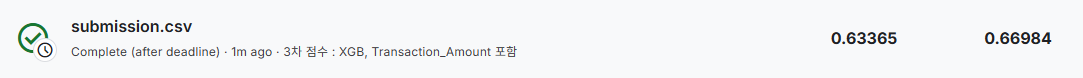

In [42]:
# train/test 다시 분리
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

tmodels(X, y);

AUC Score: 0.69793


In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')

lr_model =xgb.XGBClassifier(random_state=random_state)

lr_model.fit(X_train, y_train)

y_valid_proba = lr_model.predict_proba(X_valid)[:, 1]
auc_lr = roc_auc_score(y_valid, y_valid_proba)
print(f"Validation AUC: {auc_lr:.5f}")

y_submit_proba = lr_model.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],        # ✅ 실제 test_df의 id 그대로 사용
    "IsFraud": y_submit_proba   # 예측 확률값 저장
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv 생성 완료!")
print("submission.csv shape:", submission.shape)

Validation AUC: 0.69793
✅ submission.csv 생성 완료!
submission.csv shape: (69129, 2)


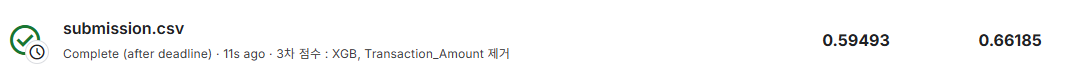

<pre>

2차 점수 : AUC Score: 0.52265 ( LR ) 
3차 점수 : AUC Score: 0.50835 ( LR, Transaction_Amount 포함 )
3차 점수 : AUC Score: 0.58870 ( LR, Transaction_Amount 제거 )
<font color=red>3차 점수 : AUC Score: 0.66984 ( XGB, Transaction_Amount 포함 ) -- 0.66984</font>
3차 점수 : AUC Score: 0.66185 ( XGB, Transaction_Amount 제거 )

## Scaling

In [44]:
df.describe()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud,is_train,Amount_Rolling_Mean
count,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,217815.000000,148686.000000,217815.000000,217815.000000
mean,109785.576710,62456.807194,0.107149,0.009729,0.481239,0.119943,-0.088274,0.101703,-0.070161,0.127797,-0.059289,-0.024272,0.151865,0.040227,-0.097298,0.079652,0.156895,0.016406,0.027872,-0.033052,-0.007855,0.009070,-0.031019,-0.050563,-0.051172,-0.002957,0.123885,0.008549,0.014268,0.017331,65.929092,0.001675,0.682625,65.928992
std,63301.485524,25637.973166,1.356449,0.983166,1.024566,1.199563,1.130487,1.211210,0.826271,0.793613,1.082800,0.790760,0.917294,0.994033,1.039219,0.855320,0.880259,0.826729,0.688328,0.780821,0.735435,0.418415,0.393349,0.595559,0.298019,0.588024,0.405668,0.470797,0.222203,0.150325,147.781983,0.040889,0.465456,86.808689
min,0.000000,0.000000,-29.807725,-19.105436,-22.092656,-39.517039,-19.722872,-5.263650,-4.993424,-37.591259,-16.357833,-16.735707,-24.162600,-5.270577,-12.630865,-4.967344,-13.089908,-4.838639,-11.739570,-5.985590,-4.281628,-18.679066,-9.981414,-8.748979,-9.846373,-2.836285,-3.868173,-1.858672,-6.438425,-4.551680,0.000000,0.000000,0.000000,0.006667
25%,54934.500000,47964.000000,-0.844258,-0.547475,-0.190850,-0.652738,-0.847150,-0.646578,-0.646846,-0.158379,-0.724243,-0.495579,-0.367783,-0.492409,-0.719086,-0.370141,-0.352927,-0.498028,-0.407828,-0.496633,-0.461679,-0.167569,-0.190194,-0.472926,-0.174399,-0.332350,-0.126319,-0.318247,-0.050724,-0.009371,5.990000,0.000000,0.000000,19.193333
50%,109919.000000,63332.000000,0.400664,-0.006858,0.503400,0.100678,-0.146539,-0.065144,-0.083814,0.098132,-0.170739,-0.072626,0.090464,0.072936,-0.024858,0.039857,0.180773,0.064491,-0.000908,-0.039384,-0.002702,-0.037643,-0.042936,-0.032639,-0.063350,0.038760,0.145956,-0.086488,0.015939,0.022190,21.800000,0.000000,1.000000,40.350000
75%,164674.500000,77556.000000,1.191058,0.634218,1.158065,0.936238,0.583315,0.575482,0.479550,0.443698,0.456493,0.474748,0.770189,0.664984,0.588964,0.509031,0.772908,0.581368,0.446515,0.445963,0.454921,0.126535,0.108801,0.354932,0.059936,0.394547,0.402866,0.252228,0.076749,0.066962,68.550000,0.000000,1.000000,78.533333
max,219128.000000,120580.000000,2.430494,9.331221,15.878405,13.678867,4.988954,12.268942,6.898794,20.976643,16.233967,39.824099,10.577848,13.423914,5.406614,4.836332,6.074859,4.180925,5.926491,3.883498,4.031429,12.349838,22.003517,3.390957,8.638156,4.215919,2.336747,3.402344,13.123618,10.906934,7475.000000,1.000000,1.000000,2533.143333


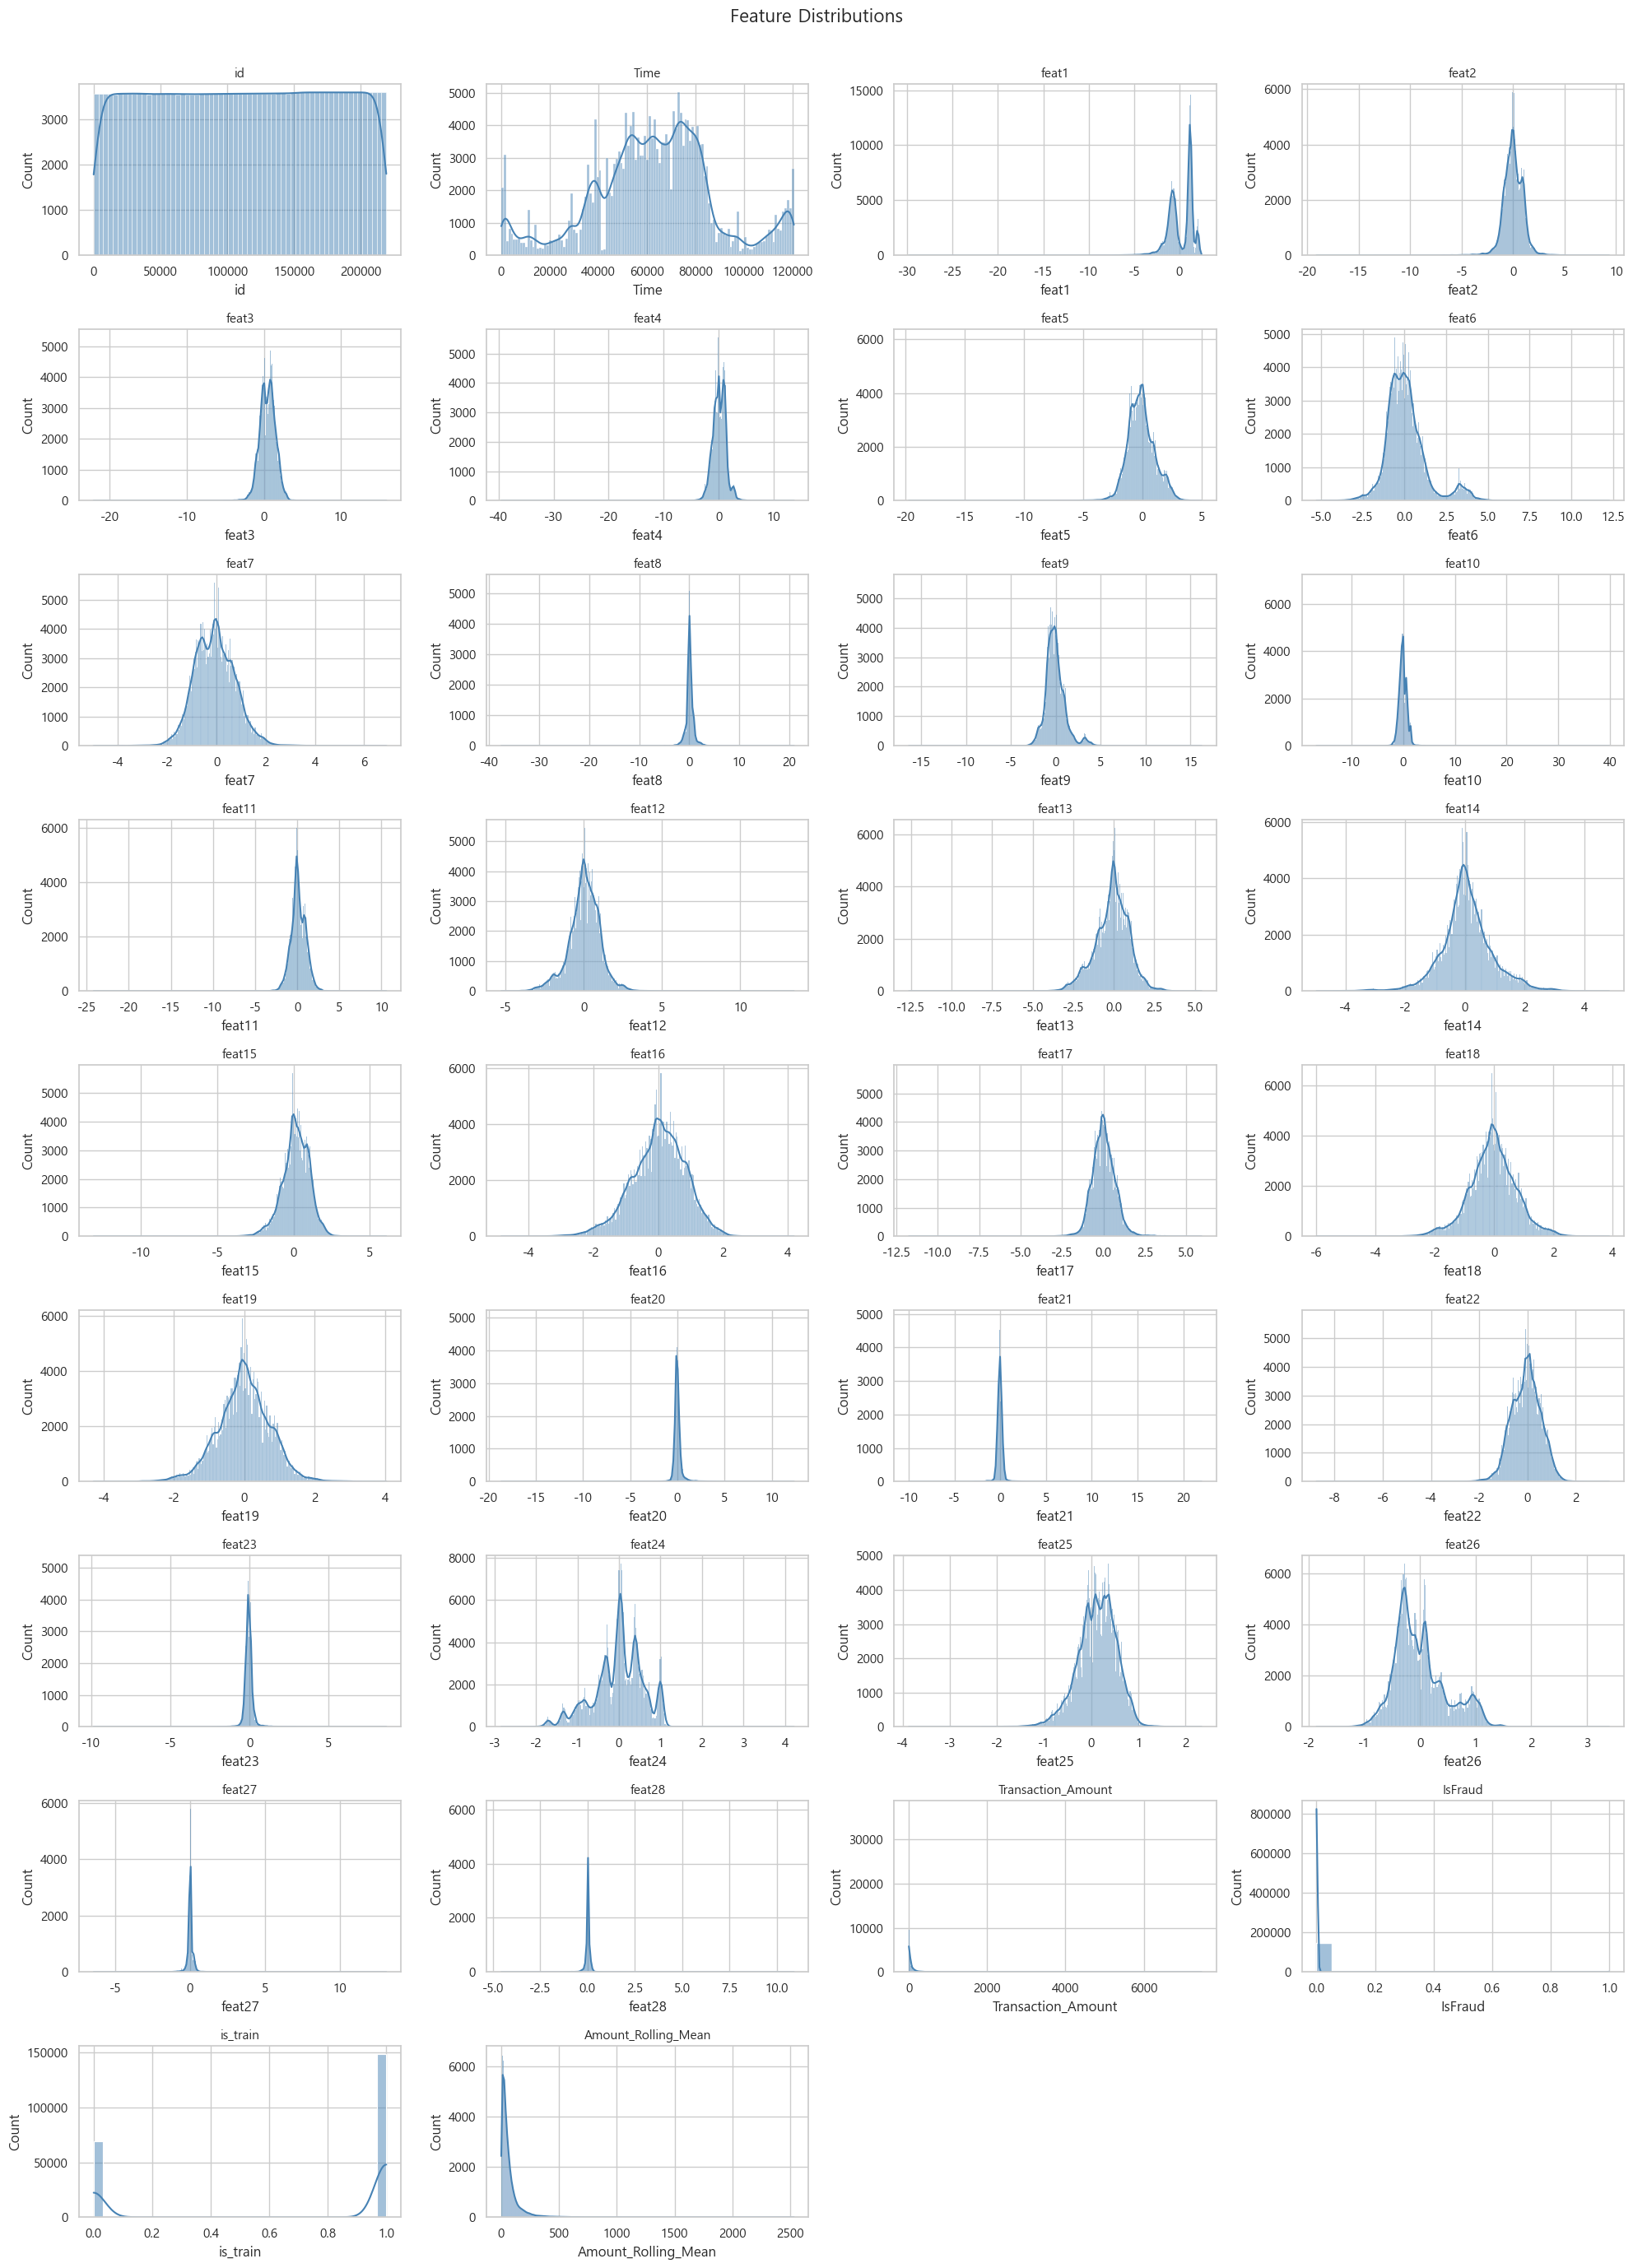

In [45]:
import math
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 행/열 개수 설정
cols = 4  # 한 행에 4개씩
rows = math.ceil(len(numeric_cols) / cols)

# 그래프 크기 설정
plt.figure(figsize=(20, rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(col, fontsize=11)
    plt.tight_layout()

plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
plt.show()

# 모델 교체 (기존 모델 : Logistic Regression, XGBClassifier )

In [46]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

In [47]:
model_list = { "LogisticRegression": LogisticRegression(max_iter=1000, random_state=random_state), 
               "DecisionTree": DecisionTreeClassifier(random_state=random_state), 
               "RandomForest": RandomForestClassifier(random_state=random_state), 
               "GradientBoosting": GradientBoostingClassifier(random_state=random_state), 
               "LightGBM": lgb.LGBMClassifier(random_state=random_state, verbosity=-1), 
               "XGBoost": xgb.XGBClassifier(random_state=random_state) }

# 제출용 feature 준비
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors="ignore")

for name, model in model_list.items():
    print(f"\n🚀 {name} 모델로 전체 train 재학습 중...")

    # 1️⃣ 전체 train 데이터로 다시 학습
    model.fit(X, y)

    # 2️⃣ 예측 확률 계산
    y_submit_proba = model.predict_proba(X_submit)[:, 1]

    # 3️⃣ submission DataFrame 생성
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # 4️⃣ CSV 파일 저장 (모델 이름 포함)
    filename = f"submission_{name}.csv"
    submission.to_csv(filename, index=False)

    print(f"✅ {filename} 생성 완료! (행 수: {len(submission)})")

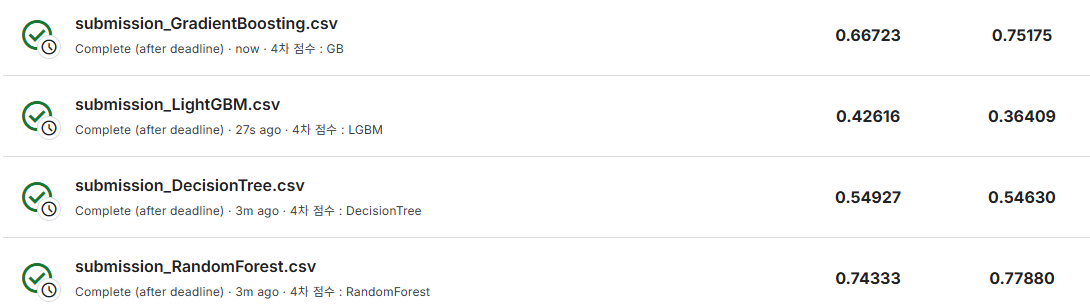

<pre>
2차 점수 : AUC Score: 0.52265 ( LR ) 
3차 점수 : AUC Score: 0.50835 ( LR, Transaction_Amount 포함 )
3차 점수 : AUC Score: 0.58870 ( LR, Transaction_Amount 제거 )
3차 점수 : AUC Score: 0.66984 ( XGB, Transaction_Amount 포함 )
3차 점수 : AUC Score: 0.66185 ( XGB, Transaction_Amount 제거 )
<font color=red>4차 점수 : AUC Score : 0.77880 ( RandomForest )</font>

## TA 제거 후 결과

In [51]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time', "Transaction_Amount"])

In [52]:
random_state=8033

model_list = {  
               "RandomForest": RandomForestClassifier(random_state=random_state) }

# 제출용 feature 준비
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time", "Transaction_Amount"], errors="ignore")

for name, model in model_list.items():
    print(f"\n🚀 {name} 모델로 전체 train 재학습 중...")

    # 1️⃣ 전체 train 데이터로 다시 학습
    model.fit(X, y)

    # 2️⃣ 예측 확률 계산
    y_submit_proba = model.predict_proba(X_submit)[:, 1]

    # 3️⃣ submission DataFrame 생성
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # 4️⃣ CSV 파일 저장 (모델 이름 포함)
    filename = f"submission_{name}.csv"
    submission.to_csv(filename, index=False)

    print(f"✅ {filename} 생성 완료! (행 수: {len(submission)})")


🚀 RandomForest 모델로 전체 train 재학습 중...
✅ submission_RandomForest.csv 생성 완료! (행 수: 69129)


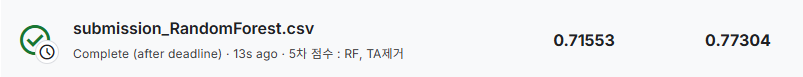

* TA 제거 안한게 점수 더 좋음

## SMOTE 적용 후 AUC 순위

In [ ]:
random_state = 8033

# ----------------------------
# 1️⃣ 제출용 feature 준비
# ----------------------------
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors="ignore")

# ----------------------------
# 2️⃣ SMOTE + 모델 파이프라인으로 전체 train 재학습 후 submission 생성
# ----------------------------
for name, model in model_list.items():
    print(f"\n🚀 {name} 모델 학습 및 제출 파일 생성 중...")

    # 파이프라인 정의 (SMOTE → 모델)
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=random_state)),
        ('model', model)
    ])
    
    # 전체 train으로 학습
    pipe.fit(X, y)

    # test 데이터 예측 확률
    y_submit_proba = pipe.predict_proba(X_submit)[:, 1]

    # submission DataFrame 생성
    submission = pd.DataFrame({
        "id": test_df["id"],
        "IsFraud": y_submit_proba
    })

    # 모델명으로 파일 저장
    filename = f"submission_{name}_SMOTE.csv"
    submission.to_csv(filename, index=False)
    
    print(f"✅ {filename} 저장 완료! (rows: {len(submission)})")

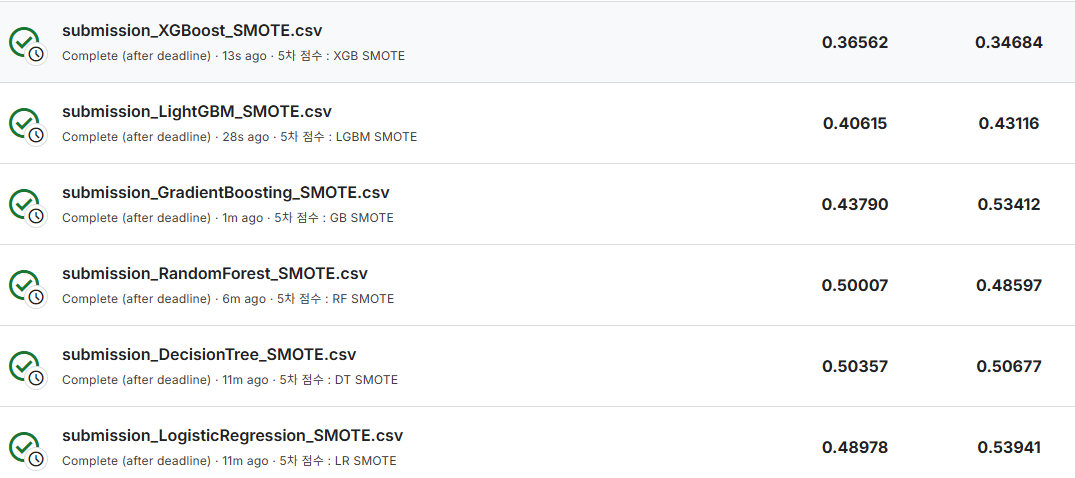

* SMOTE는 하지말자

# Optuna 튜닝
* RandomForestClassifier( random_state = random_state )  AUC: 0.77880

In [58]:
train_df = df[df["is_train"] == 1].copy()
test_df = df[df["is_train"] == 0].copy()

# target 분리
y = train_df["IsFraud"]
X = train_df.drop(columns=["IsFraud", "is_train", 'id','Time'])

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [61]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np
import pandas as pd

# ----------------------------
# 0️⃣ 기본 설정
# ----------------------------
random_state = 8033
n_trials = 5  # 탐색 횟수 (원하면 늘릴 수 있음)

# ----------------------------
# 1️⃣ Optuna 목적 함수 정의
# ----------------------------
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])

    # 모델 정의
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,  # ✅ 불균형 데이터 보정
        random_state=random_state,
        n_jobs=-1
    )

    # Stratified K-Fold 설정
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # 교차검증 AUC 계산
    auc_scores = cross_val_score(
        model, X, y,
        cv=skf,
        scoring=make_scorer(roc_auc_score, needs_proba=True),
        n_jobs=-1
    )

    mean_auc = np.mean(auc_scores)

    # ✅ 진행상황 실시간 출력
    print(f"[Trial {trial.number+1}/{n_trials}] "
          f"AUC={mean_auc:.5f} | "
          f"Params: n_estimators={n_estimators}, max_depth={max_depth}, "
          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
          f"max_features={max_features}, bootstrap={bootstrap}")

    return mean_auc

# ----------------------------
# 2️⃣ Optuna 스터디 실행
# ----------------------------
print(f"\n🚀 Optuna RandomForest 튜닝 시작 ({n_trials}회 탐색)...\n")

study = optuna.create_study(direction='maximize', study_name='RF_AUC_Opt')
study.optimize(objective, n_trials=n_trials, timeout=3600, show_progress_bar=True)

# ----------------------------
# 3️⃣ 최적 하이퍼파라미터 결과
# ----------------------------
print("\n🏆 Best AUC Score:", study.best_value)
print("🔧 Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# ----------------------------
# 4️⃣ 최적 파라미터로 최종 모델 재학습
# ----------------------------
best_rf = RandomForestClassifier(
    **study.best_params,
    random_state=random_state,
    n_jobs=-1
)
best_rf.fit(X, y)

# ----------------------------
# 5️⃣ test_df 예측 및 submission 생성
# ----------------------------
X_submit = test_df.drop(columns=["IsFraud", "is_train", "id", "Time"], errors='ignore')
y_submit_proba = best_rf.predict_proba(X_submit)[:, 1]

submission = pd.DataFrame({
    "id": test_df["id"],
    "IsFraud": y_submit_proba
})

submission.to_csv("submission_RandomForest_Optuna.csv", index=False)
print("\n✅ submission_RandomForest_Optuna.csv 생성 완료!")


[I 2025-10-27 14:02:11,758] A new study created in memory with name: RF_AUC_Opt



🚀 Optuna RandomForest 튜닝 시작 (5회 탐색)...



 20%|██████████████████▍                                                                         | 1/5 [00:43<02:55, 43.83s/it, 43.83/3600 seconds]

[Trial 1/5] AUC=nan | Params: n_estimators=332, max_depth=3, min_samples_split=13, min_samples_leaf=3, max_features=sqrt, bootstrap=False
[W 2025-10-27 14:02:55,576] Trial 0 failed with parameters: {'n_estimators': 332, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:02:55,586] Trial 0 failed with value np.float64(nan).


 40%|████████████████████████████████████                                                      | 2/5 [04:25<07:25, 148.63s/it, 265.82/3600 seconds]

[Trial 2/5] AUC=nan | Params: n_estimators=155, max_depth=5, min_samples_split=16, min_samples_leaf=9, max_features=None, bootstrap=False
[W 2025-10-27 14:06:37,581] Trial 1 failed with parameters: {'n_estimators': 155, 'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:06:37,583] Trial 1 failed with value np.float64(nan).


 60%|██████████████████████████████████████████████████████                                    | 3/5 [06:27<04:32, 136.14s/it, 387.09/3600 seconds]

[Trial 3/5] AUC=nan | Params: n_estimators=435, max_depth=8, min_samples_split=12, min_samples_leaf=2, max_features=sqrt, bootstrap=True
[W 2025-10-27 14:08:38,841] Trial 2 failed with parameters: {'n_estimators': 435, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:08:38,850] Trial 2 failed with value np.float64(nan).


 80%|████████████████████████████████████████████████████████████████████████                  | 4/5 [07:25<01:45, 105.36s/it, 445.27/3600 seconds]

[Trial 4/5] AUC=nan | Params: n_estimators=273, max_depth=6, min_samples_split=13, min_samples_leaf=9, max_features=sqrt, bootstrap=True
[W 2025-10-27 14:09:37,021] Trial 3 failed with parameters: {'n_estimators': 273, 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': None} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:09:37,030] Trial 3 failed with value np.float64(nan).


100%|██████████████████████████████████████████████████████████████████████████████████████████| 5/5 [10:26<00:00, 125.39s/it, 626.93/3600 seconds]

[Trial 5/5] AUC=nan | Params: n_estimators=363, max_depth=14, min_samples_split=14, min_samples_leaf=10, max_features=sqrt, bootstrap=False
[W 2025-10-27 14:12:38,687] Trial 4 failed with parameters: {'n_estimators': 363, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': 'balanced'} because of the following error: The value nan is not acceptable.
[W 2025-10-27 14:12:38,689] Trial 4 failed with value np.float64(nan).


ValueError: No trials are completed yet.

In [56]:
import numpy as np
print("NaN count:", np.isnan(X_train).sum())
print("Inf count:", np.isinf(X_train).sum())
print("Target distribution:", np.unique(y_train, return_counts=True))

NaN count: feat1                  0
feat2                  0
feat3                  0
feat4                  0
feat5                  0
feat6                  0
feat7                  0
feat8                  0
feat9                  0
feat10                 0
feat11                 0
feat12                 0
feat13                 0
feat14                 0
feat15                 0
feat16                 0
feat17                 0
feat18                 0
feat19                 0
feat20                 0
feat21                 0
feat22                 0
feat23                 0
feat24                 0
feat25                 0
feat26                 0
feat27                 0
feat28                 0
Transaction_Amount     0
Amount_Rolling_Mean    0
dtype: int64
Inf count: feat1                  0
feat2                  0
feat3                  0
feat4                  0
feat5                  0
feat6                  0
feat7                  0
feat8                  0
feat9          

# 최종 점수 (5등)
* https://www.kaggle.com/competitions/credit-card-fraud-prediction/submissions

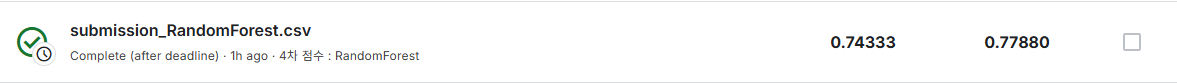

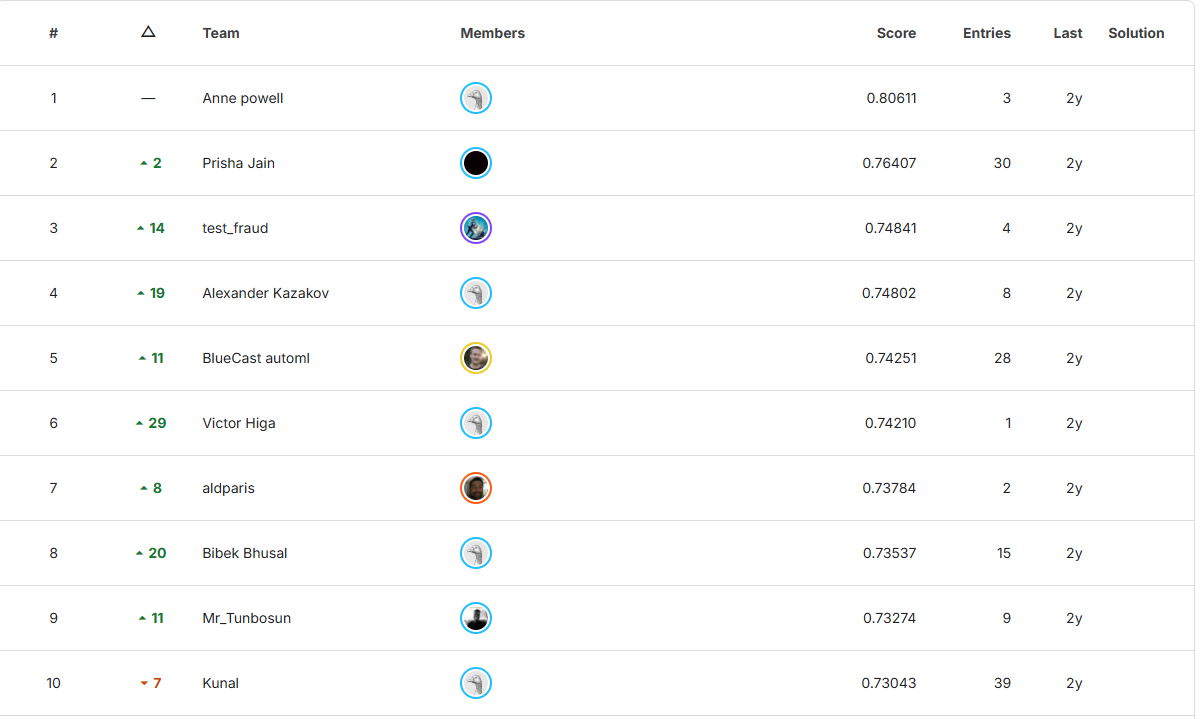